# Project 1: SAT & ACT Analysis

The first markdown cell in a notebook is a great place to provide an overview of your entire project. You will likely want to at least state your

## Problem Statement

Define the problem you are finding answers for from the data given.

## Executive Summary

If you want to, it's great to use relative links to direct your audience to various sections of a notebook. **HERE'S A DEMONSTRATION WITH THE CURRENT SECTION HEADERS**:

### Contents:
- [2017 Data Import & Cleaning](#Data-Import-and-Cleaning)
- [2018 Data Import and Cleaning](#2018-Data-Import-and-Cleaning)
- [Exploratory Data Analysis](#Exploratory-Data-Analysis)
- [Data Visualization](#Visualize-the-data)
- [Descriptive and Inferential Statistics](#Descriptive-and-Inferential-Statistics)
- [Outside Research](#Outside-Research)
- [Conclusions and Recommendations](#Conclusions-and-Recommendations)

**If you combine your problem statement, executive summary, data dictionary, and conclusions/recommendations, you have an amazing README.md file that quickly aligns your audience to the contents of your project.** Don't forget to cite your data sources!

*All libraries used should be added here*

In [1]:
#Imports:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
sns.set_style('whitegrid')
%config InlineBackend.figure_format = 'retina'
%matplotlib inline

## 2017 Data Import and Cleaning

#### 1. Read In SAT & ACT  Data

Read in the `sat_2017.csv` and `act_2017.csv` files and assign them to appropriately named pandas dataframes.

In [2]:
#Importing act & sat 2017 csv files into jupyter
sat_2017 = pd.read_csv('../data/sat_2017.csv')
act_2017 = pd.read_csv('../data/act_2017.csv')

#### 2. Display Data

Print the first 10 rows of each dataframe to your jupyter notebook

In [3]:
#Display first 10 index of dataset
sat_2017.head(10)

,State,Participation,Evidence-Based Reading and Writing,Math,Total
0,Alabama,5%,593,572,1165
1,Alaska,38%,547,533,1080
2,Arizona,30%,563,553,1116
3,Arkansas,3%,614,594,1208
4,California,53%,531,524,1055
5,Colorado,11%,606,595,1201
6,Connecticut,100%,530,512,1041
7,Delaware,100%,503,492,996
8,District of Columbia,100%,482,468,950
9,Florida,83%,520,497,1017


In [4]:
#Display first 10 index of dataset
act_2017.head(10)

,State,Participation,English,Math,Reading,Science,Composite
0,National,60%,20.3,20.7,21.4,21.0,21.0
1,Alabama,100%,18.9,18.4,19.7,19.4,19.2
2,Alaska,65%,18.7,19.8,20.4,19.9,19.8
3,Arizona,62%,18.6,19.8,20.1,19.8,19.7
4,Arkansas,100%,18.9,19.0,19.7,19.5,19.4
5,California,31%,22.5,22.7,23.1,22.2,22.8
6,Colorado,100%,20.1,20.3,21.2,20.9,20.8
7,Connecticut,31%,25.5,24.6,25.6,24.6,25.2
8,Delaware,18%,24.1,23.4,24.8,23.6,24.1
9,District of Columbia,32%,24.4,23.5,24.9,23.5,24.2


#### 3. Verbally Describe Data

Take your time looking through the data and thoroughly describe the data in the markdown cell below. 

**Answer:**
1. SAT has less columns compared to ACT, SAT has 5 columns while ACT has 7
2. SAT does not have the National dataset, thus sat has 51 index of set while act has 52
3. 'Composite' column in ACT test is the *mean* value of the row but 'Total' column in SAT test is the *sum* of all values in the row
4. The District of Columbia is not a state, it is a federal district (but for this project we will assume it is a state)

#### 4a. Does the data look complete? 

**Answer:**
Yes

#### 4b. Are there any obvious issues with the observations?

**What is the minimum *possible* value for each test/subtest? What is the maximum *possible* value?**

Consider comparing any questionable values to the sources of your data:
- [SAT](https://blog.collegevine.com/here-are-the-average-sat-scores-by-state/)
- [ACT](https://blog.prepscholar.com/act-scores-by-state-averages-highs-and-lows)

**Answer:**
1. The minimum grade is 1 the maximum grade is 36 for act
2. The minimum grade is 200 the maximum grade is 800 for sat
---
reference information: https://blog.prepscholar.com/act-vs-sat

#### 4c. Fix any errors you identified

**The data is available** so there's no need to guess or calculate anything. If you didn't find any errors, continue to the next step.

**Answer:**
There are '%', 'x' & ' ' string in the columns

#### 5. What are your data types? 
Display the data types of each feature. 

In [5]:
#Display data type for act_2017
act_2017.dtypes

State             object
Participation     object
English          float64
Math             float64
Reading          float64
Science          float64
Composite         object
dtype: object

In [6]:
#Display data type for sat_2017
sat_2017.dtypes

State                                 object
Participation                         object
Evidence-Based Reading and Writing     int64
Math                                   int64
Total                                  int64
dtype: object

What did you learn?
- Do any of them seem odd?  
- Which ones are not as they should be?  

**Answer:**
1. The values contain whitespaces, so it shows sata types as objects when it should be in int or float
2. Column 'Participation' type should be in float , but the '%' can be easily be removed and obtain a float or int
3. Column 'total' type should be in float or int

#### 6. Fix Incorrect Data Types
Based on what you discovered above, use appropriate methods to re-type incorrectly typed data.
- Define a function that will allow you to convert participation rates to an appropriate numeric type. Use `map` or `apply` to change these columns in each dataframe.

In [7]:
#Creating a function to remove percentages from a column
def percentage_remove (DataFrame,x):
    DataFrame[x] = DataFrame[x].apply(lambda i: i.replace('%',''))
    return DataFrame

In [8]:
#Creating a function to remove whitespace from a column
def whitespace_remove (DataFrame,x):
    DataFrame[x] = DataFrame[x].apply(lambda i: i.replace(' ',''))
    return DataFrame

In [9]:
#Creating a function to change numerals from object to float in column
def float_object (DataFrame,x):
    DataFrame[x] = DataFrame[x].apply(lambda i: float(i))
    return DataFrame

In [10]:
#Creating a function to remove conditions from a column
def x_remove (DataFrame,x):
    DataFrame[x] = DataFrame[x].apply(lambda i: i.replace('x',''))
    return DataFrame

In [11]:
#Removing percentages from dataframe column 'Participation'
act_2017 = percentage_remove(act_2017,'Participation')
sat_2017 = percentage_remove(sat_2017,'Participation')

In [12]:
#Removing whitespace from dataframe column 'Participation'
act_2017 = whitespace_remove(act_2017,'Participation')
sat_2017 = whitespace_remove(sat_2017,'Participation')

In [13]:
#Removing condition symbols from dataframe column 'Composite'
act_2017 = x_remove(act_2017,'Composite')

In [14]:
#Changing objects to float from dataframe column 'Participation'
act_2017 = float_object(act_2017,'Participation')
sat_2017 = float_object(sat_2017,'Participation')

In [15]:
#Changing objects to float from dataframe column 'Composite'
act_2017 = float_object(act_2017,'Composite')

In [16]:
#Changing objects to float from dataframe column 'Total'
sat_2017 = float_object(sat_2017,'Total')

- Fix any individual values preventing other columns from being the appropriate type.

In [17]:
#Checking ACT 2017 for any null values
act_2017.isnull().sum()

State            0
Participation    0
English          0
Math             0
Reading          0
Science          0
Composite        0
dtype: int64

In [18]:
#Checking SAT  2017 for any null values
sat_2017.isnull().sum()

State                                 0
Participation                         0
Evidence-Based Reading and Writing    0
Math                                  0
Total                                 0
dtype: int64

Answer: There are no more inappropriate data

- Finish your data modifications by making sure the columns are now typed appropriately.

In [19]:
#Check data type
act_2017.dtypes

State             object
Participation    float64
English          float64
Math             float64
Reading          float64
Science          float64
Composite        float64
dtype: object

In [20]:
#Check data type
sat_2017.dtypes

State                                  object
Participation                         float64
Evidence-Based Reading and Writing      int64
Math                                    int64
Total                                 float64
dtype: object

- Display the data types again to confirm they are correct.

Done

#### 7. Rename Columns
Change the names of the columns to more expressive names so that you can tell the difference the SAT columns and the ACT columns. Your solution should map all column names being changed at once (no repeated singular name-changes). **We will be combining these data with some of the data from 2018, and so you should name columns in an appropriate way**.

**Guidelines**:
- Column names should be all lowercase (you will thank yourself when you start pushing data to SQL later in the course)
- Column names should not contain spaces (underscores will suffice--this allows for using the `df.column_name` method to access columns in addition to `df['column_name']`.
- Column names should be unique and informative (the only feature that we actually share between dataframes is the state).

In [21]:
list(act_2017)

['State',
 'Participation',
 'English',
 'Math',
 'Reading',
 'Science',
 'Composite']

In [22]:
#change header names
act_2017.columns = ['State',
 'ACT_Participation_17',
 'ACT_English_17',
 'ACT_Math_17',
 'ACT_Reading_17',
 'ACT_Science_17',
 'ACT_Composite_17']

In [23]:
act_2017.head()

,State,ACT_Participation_17,ACT_English_17,ACT_Math_17,ACT_Reading_17,ACT_Science_17,ACT_Composite_17
0,National,60.0,20.3,20.7,21.4,21.0,21.0
1,Alabama,100.0,18.9,18.4,19.7,19.4,19.2
2,Alaska,65.0,18.7,19.8,20.4,19.9,19.8
3,Arizona,62.0,18.6,19.8,20.1,19.8,19.7
4,Arkansas,100.0,18.9,19.0,19.7,19.5,19.4


In [24]:
#change header names
sat_2017.columns = ['State',
 'SAT_Participation_17',
 'SAT_Evidence-Based_Reading_and_Writing_17',
 'SAT_Math_17',
 'SAT_Total_17']

In [25]:
sat_2017.head()

,State,SAT_Participation_17,SAT_Evidence-Based_Reading_and_Writing_17,SAT_Math_17,SAT_Total_17
0,Alabama,5.0,593,572,1165.0
1,Alaska,38.0,547,533,1080.0
2,Arizona,30.0,563,553,1116.0
3,Arkansas,3.0,614,594,1208.0
4,California,53.0,531,524,1055.0


#### 8. Create a data dictionary

Now that we've fixed our data, and given it appropriate names, let's create a [data dictionary](http://library.ucmerced.edu/node/10249). 

A data dictionary provides a quick overview of features/variables/columns, alongside data types and descriptions. The more descriptive you can be, the more useful this document is.

Example of a Fictional Data Dictionary Entry: 

|Feature|Type|Dataset|Description|
|---|---|---|---|
|**county_pop**|*integer*|2010 census|The population of the county (units in thousands, where 2.5 represents 2500 people).| 
|**per_poverty**|*float*|2010 census|The percent of the county over the age of 18 living below the 200% of official US poverty rate (units percent to two decimal places 98.10 means 98.1%)|

[Here's a quick link to a short guide for formatting markdown in Jupyter notebooks](https://jupyter-notebook.readthedocs.io/en/stable/examples/Notebook/Working%20With%20Markdown%20Cells.html).

Provided is the skeleton for formatting a markdown table, with columns headers that will help you create a data dictionary to quickly summarize your data, as well as some examples. **This would be a great thing to copy and paste into your custom README for this project.**

#### Data Dictionary
|Feature|Type|Dataset|Description|
|---|---|---|---|
|**State**|*object*|ACT/SAT|The name of one of United States of America's National state| 
|**ACT_Participation**|*float*|ACT|Percentage of actual number people attending the ACT examination compared to the number people registered | 
|**SAT_Participation**|*float*|SAT|Percentage of actual number people attending the SAT examination compared to the number people registered | 
|**ACT_English**|*float*|ACT|Mean score of participants taking ACT exam for english| 
|**ACT_Math**|*float*|ACT|Mean score of participants taking ACT exam for math| 
|**ACT_Reading**|*float*|ACT|Mean score of participants taking ACT exam for reading| 
|**ACT_Science**|*float*|ACT|Mean score of participants taking ACT exam for science| 
|**ACT_Composite**|*float*|ACT|Mean score of participants taking ACT exam for all examinations|
|**SAT_Evidence-Based_Reading_and_Writing**|*float*|SAT|Mean score of participants taking SAT exam for all examinations| 
|**SAT_Math**|*float*|SAT|Mean score of participants taking SAT exam for maths|
|**SAT_Total**|*float*|SAT|Total score of participants taking SAT exam for all examinations|

#### 9. Drop unnecessary rows

One of our dataframes contains an extra row. Identify and remove this from the dataframe.

In [26]:
#Remove National Row
act_2017 = act_2017.drop(act_2017.index[0])
act_2017

,State,ACT_Participation_17,ACT_English_17,ACT_Math_17,ACT_Reading_17,ACT_Science_17,ACT_Composite_17
1,Alabama,100.0,18.9,18.4,19.7,19.4,19.2
2,Alaska,65.0,18.7,19.8,20.4,19.9,19.8
3,Arizona,62.0,18.6,19.8,20.1,19.8,19.7
4,Arkansas,100.0,18.9,19.0,19.7,19.5,19.4
5,California,31.0,22.5,22.7,23.1,22.2,22.8
6,Colorado,100.0,20.1,20.3,21.2,20.9,20.8
7,Connecticut,31.0,25.5,24.6,25.6,24.6,25.2
8,Delaware,18.0,24.1,23.4,24.8,23.6,24.1
9,District of Columbia,32.0,24.4,23.5,24.9,23.5,24.2
10,Florida,73.0,19.0,19.4,21.0,19.4,19.8


#### 10. Merge Dataframes

Join the 2017 ACT and SAT dataframes using the state in each dataframe as the key. Assign this to a new variable.

In [27]:
#Merge data
combined_2017 = act_2017.merge(sat_2017, on = 'State')
combined_2017

,State,ACT_Participation_17,ACT_English_17,ACT_Math_17,ACT_Reading_17,ACT_Science_17,ACT_Composite_17,SAT_Participation_17,SAT_Evidence-Based_Reading_and_Writing_17,SAT_Math_17,SAT_Total_17
0,Alabama,100.0,18.9,18.4,19.7,19.4,19.2,5.0,593,572,1165.0
1,Alaska,65.0,18.7,19.8,20.4,19.9,19.8,38.0,547,533,1080.0
2,Arizona,62.0,18.6,19.8,20.1,19.8,19.7,30.0,563,553,1116.0
3,Arkansas,100.0,18.9,19.0,19.7,19.5,19.4,3.0,614,594,1208.0
4,California,31.0,22.5,22.7,23.1,22.2,22.8,53.0,531,524,1055.0
5,Colorado,100.0,20.1,20.3,21.2,20.9,20.8,11.0,606,595,1201.0
6,Connecticut,31.0,25.5,24.6,25.6,24.6,25.2,100.0,530,512,1041.0
7,Delaware,18.0,24.1,23.4,24.8,23.6,24.1,100.0,503,492,996.0
8,District of Columbia,32.0,24.4,23.5,24.9,23.5,24.2,100.0,482,468,950.0
9,Florida,73.0,19.0,19.4,21.0,19.4,19.8,83.0,520,497,1017.0


#### 11. Save your cleaned, merged dataframe

Use a relative path to save out your data as `combined_2017.csv`.

In [28]:
#export dataframe for 2017 
combined_2017.to_csv(r'../data/combined_2017.csv')

## 2018 Data Import and Cleaning

Links to the 2018 ACT and SAT data are provided in the README. These data live in PDFs, and so you'll get to enjoy practicing some *manual* data collection. Save these data as a CSV in your `data` directory, and import, explore, and clean these data in the same way you did above. **Make sure you comment on your steps so it is clear *why* you are doing each process**.

In [29]:
#Importing act & sat 2018 csv files into jupyter
sat_2018 = pd.read_csv('../data/sat_2018.csv')
act_2018 = pd.read_csv('../data/act_2018.csv')

In [30]:
#Display first 10 index of dataset
sat_2018.head(10)

,State,Participation,Evidence-Based Reading and Writing,Math,Total
0,Alabama,6%,595,571,1166
1,Alaska,43%,562,544,1106
2,Arizona,29%,577,572,1149
3,Arkansas,5%,592,576,1169
4,California,60%,540,536,1076
5,Colorado,100%,519,506,1025
6,Connecticut,100%,535,519,1053
7,Delaware,100%,505,492,998
8,District of Columbia,92%,497,480,977
9,Florida,56%,550,549,1099


In [31]:
#Display first 10 index of dataset
act_2018.head(10)

,State,Participation,Composite,English,Math,Reading,Science
0,Alabama,100,19.1,18.9,18.3,19.6,19.0
1,Alaska,33,20.8,19.8,20.6,21.6,20.7
2,Arizona,66,19.2,18.2,19.4,19.5,19.2
3,Arkansas,100,19.4,19.1,18.9,19.7,19.4
4,California,27,22.7,22.5,22.5,23.0,22.1
5,Colorado,30,23.9,23.9,23.2,24.4,23.5
6,Connecticut,26,25.6,26.0,24.8,26.1,24.9
7,Delaware,17,23.2,23.7,23.1,24.5,23.4
8,District of Columbia,32,23.6,23.7,22.7,24.4,23.0
9,Florida,66,19.9,19.2,19.3,21.1,19.5


In [32]:
#Display data type for act_2018
act_2018.dtypes

State             object
Participation      int64
Composite        float64
English          float64
Math             float64
Reading          float64
Science          float64
dtype: object

In [33]:
#Display data type for sat_2018
sat_2018.dtypes

State                                 object
Participation                         object
Evidence-Based Reading and Writing     int64
Math                                   int64
Total                                  int64
dtype: object

In [34]:
#Removing percentages from dataframe column 'Participation'
#act_2018 = percentage_remove(act_2018,'Participation')
sat_2018 = percentage_remove(sat_2018,'Participation')

In [35]:
#Removing whitespace from dataframe column 'Participation'
#act_2018 = whitespace_remove(act_2018,'Participation')
sat_2018 = whitespace_remove(sat_2018,'Participation')

In [36]:
#Removing condition symbols from dataframe column 'Composite'
#act_2018 = x_remove(act_2018,'Composite')

In [37]:
#Changing objects to float from dataframe column 'Participation'
act_2018 = float_object(act_2018,'Participation')
sat_2018 = float_object(sat_2018,'Participation')

In [38]:
#Changing objects to float from dataframe column 'Composite'
act_2018 = float_object(act_2018,'Composite')

In [39]:
#Changing objects to float from dataframe column 'Total'
sat_2018 = float_object(sat_2018,'Total')

In [40]:
#Checking ACT  2018 for any null values
act_2018.isnull().sum()

State            0
Participation    0
Composite        0
English          0
Math             0
Reading          0
Science          0
dtype: int64

In [41]:
#Checking SAT  2018 for any null values
sat_2018.isnull().sum()

State                                 0
Participation                         0
Evidence-Based Reading and Writing    0
Math                                  0
Total                                 0
dtype: int64

In [42]:
#Check data types
act_2018.dtypes

State             object
Participation    float64
Composite        float64
English          float64
Math             float64
Reading          float64
Science          float64
dtype: object

In [43]:
#Check data types
sat_2018.dtypes

State                                  object
Participation                         float64
Evidence-Based Reading and Writing      int64
Math                                    int64
Total                                 float64
dtype: object

In [44]:
#change header names
act_2018.columns = ['State',
 'ACT_Participation_18',
 'ACT_English_18',
 'ACT_Math_18',
 'ACT_Reading_18',
 'ACT_Science_18',
 'ACT_Composite_18']

In [45]:
#check if header names have changed
act_2018.head(1)

,State,ACT_Participation_18,ACT_English_18,ACT_Math_18,ACT_Reading_18,ACT_Science_18,ACT_Composite_18
0,Alabama,100.0,19.1,18.9,18.3,19.6,19.0


In [46]:
#change header names
sat_2018.columns = ['State',
 'SAT_Participation_18',
 'SAT_Evidence-Based_Reading_and_Writing_18',
 'SAT_Math_18',
 'SAT_Total_18']

In [47]:
#check if header names have changed
sat_2018.head(1)

,State,SAT_Participation_18,SAT_Evidence-Based_Reading_and_Writing_18,SAT_Math_18,SAT_Total_18
0,Alabama,6.0,595,571,1166.0


In [48]:
#Remove National Row
act_2018 = act_2018.drop(act_2018.index[0])
act_2018

,State,ACT_Participation_18,ACT_English_18,ACT_Math_18,ACT_Reading_18,ACT_Science_18,ACT_Composite_18
1,Alaska,33.0,20.8,19.8,20.6,21.6,20.7
2,Arizona,66.0,19.2,18.2,19.4,19.5,19.2
3,Arkansas,100.0,19.4,19.1,18.9,19.7,19.4
4,California,27.0,22.7,22.5,22.5,23.0,22.1
5,Colorado,30.0,23.9,23.9,23.2,24.4,23.5
6,Connecticut,26.0,25.6,26.0,24.8,26.1,24.9
7,Delaware,17.0,23.2,23.7,23.1,24.5,23.4
8,District of Columbia,32.0,23.6,23.7,22.7,24.4,23.0
9,Florida,66.0,19.9,19.2,19.3,21.1,19.5
10,Georgia,53.0,21.4,20.9,20.7,21.2,21.4


In [49]:
#Merge data
combined_2018 = act_2018.merge(sat_2018, on = 'State')
combined_2018

,State,ACT_Participation_18,ACT_English_18,ACT_Math_18,ACT_Reading_18,ACT_Science_18,ACT_Composite_18,SAT_Participation_18,SAT_Evidence-Based_Reading_and_Writing_18,SAT_Math_18,SAT_Total_18
0,Alaska,33.0,20.8,19.8,20.6,21.6,20.7,43.0,562,544,1106.0
1,Arizona,66.0,19.2,18.2,19.4,19.5,19.2,29.0,577,572,1149.0
2,Arkansas,100.0,19.4,19.1,18.9,19.7,19.4,5.0,592,576,1169.0
3,California,27.0,22.7,22.5,22.5,23.0,22.1,60.0,540,536,1076.0
4,Colorado,30.0,23.9,23.9,23.2,24.4,23.5,100.0,519,506,1025.0
5,Connecticut,26.0,25.6,26.0,24.8,26.1,24.9,100.0,535,519,1053.0
6,Delaware,17.0,23.2,23.7,23.1,24.5,23.4,100.0,505,492,998.0
7,District of Columbia,32.0,23.6,23.7,22.7,24.4,23.0,92.0,497,480,977.0
8,Florida,66.0,19.9,19.2,19.3,21.1,19.5,56.0,550,549,1099.0
9,Georgia,53.0,21.4,20.9,20.7,21.2,21.4,70.0,542,522,1064.0


In [50]:
#export dataframe for 2018
combined_2018.to_csv(r'../data/combined_2018.csv')

#### Combine your 2017 and 2018 data into a single dataframe
Joining on state names should work, assuming you formatted all your state names identically. Make sure none of your columns (other than state) have identical names. Do yourself a favor and decide if you're encoding participation rates as floats or integers and standardize this across your datasets.

Save the contents of this merged dataframe as `final.csv`.

**Use this combined dataframe for the remainder of the project**.

In [51]:
#Merge data and show data
final = combined_2018.merge(combined_2017, on = 'State')
final

,State,ACT_Participation_18,ACT_English_18,ACT_Math_18,ACT_Reading_18,ACT_Science_18,ACT_Composite_18,SAT_Participation_18,SAT_Evidence-Based_Reading_and_Writing_18,SAT_Math_18,...,ACT_Participation_17,ACT_English_17,ACT_Math_17,ACT_Reading_17,ACT_Science_17,ACT_Composite_17,SAT_Participation_17,SAT_Evidence-Based_Reading_and_Writing_17,SAT_Math_17,SAT_Total_17
0,Alaska,33.0,20.8,19.8,20.6,21.6,20.7,43.0,562,544,...,65.0,18.7,19.8,20.4,19.9,19.8,38.0,547,533,1080.0
1,Arizona,66.0,19.2,18.2,19.4,19.5,19.2,29.0,577,572,...,62.0,18.6,19.8,20.1,19.8,19.7,30.0,563,553,1116.0
2,Arkansas,100.0,19.4,19.1,18.9,19.7,19.4,5.0,592,576,...,100.0,18.9,19.0,19.7,19.5,19.4,3.0,614,594,1208.0
3,California,27.0,22.7,22.5,22.5,23.0,22.1,60.0,540,536,...,31.0,22.5,22.7,23.1,22.2,22.8,53.0,531,524,1055.0
4,Colorado,30.0,23.9,23.9,23.2,24.4,23.5,100.0,519,506,...,100.0,20.1,20.3,21.2,20.9,20.8,11.0,606,595,1201.0
5,Connecticut,26.0,25.6,26.0,24.8,26.1,24.9,100.0,535,519,...,31.0,25.5,24.6,25.6,24.6,25.2,100.0,530,512,1041.0
6,Delaware,17.0,23.2,23.7,23.1,24.5,23.4,100.0,505,492,...,18.0,24.1,23.4,24.8,23.6,24.1,100.0,503,492,996.0
7,District of Columbia,32.0,23.6,23.7,22.7,24.4,23.0,92.0,497,480,...,32.0,24.4,23.5,24.9,23.5,24.2,100.0,482,468,950.0
8,Florida,66.0,19.9,19.2,19.3,21.1,19.5,56.0,550,549,...,73.0,19.0,19.4,21.0,19.4,19.8,83.0,520,497,1017.0
9,Georgia,53.0,21.4,20.9,20.7,21.2,21.4,70.0,542,522,...,55.0,21.0,20.9,22.0,21.3,21.4,61.0,535,515,1050.0


In [52]:
final.columns

Index(['State', 'ACT_Participation_18', 'ACT_English_18', 'ACT_Math_18',
       'ACT_Reading_18', 'ACT_Science_18', 'ACT_Composite_18',
       'SAT_Participation_18', 'SAT_Evidence-Based_Reading_and_Writing_18',
       'SAT_Math_18', 'SAT_Total_18', 'ACT_Participation_17', 'ACT_English_17',
       'ACT_Math_17', 'ACT_Reading_17', 'ACT_Science_17', 'ACT_Composite_17',
       'SAT_Participation_17', 'SAT_Evidence-Based_Reading_and_Writing_17',
       'SAT_Math_17', 'SAT_Total_17'],
      dtype='object')

In [53]:
#export final dataframe
final.to_csv(r'../data/final.csv')

## Exploratory Data Analysis


### Summary Statistics
Transpose the output of pandas `describe` method to create a quick overview of each numeric feature.

In [54]:
#Show the data information
final.describe

<bound method NDFrame.describe of                    State  ACT_Participation_18  ACT_English_18  ACT_Math_18  \
0                 Alaska                  33.0            20.8         19.8   
1                Arizona                  66.0            19.2         18.2   
2               Arkansas                 100.0            19.4         19.1   
3             California                  27.0            22.7         22.5   
4               Colorado                  30.0            23.9         23.9   
5            Connecticut                  26.0            25.6         26.0   
6               Delaware                  17.0            23.2         23.7   
7   District of Columbia                  32.0            23.6         23.7   
8                Florida                  66.0            19.9         19.2   
9                Georgia                  53.0            21.4         20.9   
10                Hawaii                  89.0            18.9         18.2   
11                

In [55]:
#Show the entire dataframe of Final
final

,State,ACT_Participation_18,ACT_English_18,ACT_Math_18,ACT_Reading_18,ACT_Science_18,ACT_Composite_18,SAT_Participation_18,SAT_Evidence-Based_Reading_and_Writing_18,SAT_Math_18,...,ACT_Participation_17,ACT_English_17,ACT_Math_17,ACT_Reading_17,ACT_Science_17,ACT_Composite_17,SAT_Participation_17,SAT_Evidence-Based_Reading_and_Writing_17,SAT_Math_17,SAT_Total_17
0,Alaska,33.0,20.8,19.8,20.6,21.6,20.7,43.0,562,544,...,65.0,18.7,19.8,20.4,19.9,19.8,38.0,547,533,1080.0
1,Arizona,66.0,19.2,18.2,19.4,19.5,19.2,29.0,577,572,...,62.0,18.6,19.8,20.1,19.8,19.7,30.0,563,553,1116.0
2,Arkansas,100.0,19.4,19.1,18.9,19.7,19.4,5.0,592,576,...,100.0,18.9,19.0,19.7,19.5,19.4,3.0,614,594,1208.0
3,California,27.0,22.7,22.5,22.5,23.0,22.1,60.0,540,536,...,31.0,22.5,22.7,23.1,22.2,22.8,53.0,531,524,1055.0
4,Colorado,30.0,23.9,23.9,23.2,24.4,23.5,100.0,519,506,...,100.0,20.1,20.3,21.2,20.9,20.8,11.0,606,595,1201.0
5,Connecticut,26.0,25.6,26.0,24.8,26.1,24.9,100.0,535,519,...,31.0,25.5,24.6,25.6,24.6,25.2,100.0,530,512,1041.0
6,Delaware,17.0,23.2,23.7,23.1,24.5,23.4,100.0,505,492,...,18.0,24.1,23.4,24.8,23.6,24.1,100.0,503,492,996.0
7,District of Columbia,32.0,23.6,23.7,22.7,24.4,23.0,92.0,497,480,...,32.0,24.4,23.5,24.9,23.5,24.2,100.0,482,468,950.0
8,Florida,66.0,19.9,19.2,19.3,21.1,19.5,56.0,550,549,...,73.0,19.0,19.4,21.0,19.4,19.8,83.0,520,497,1017.0
9,Georgia,53.0,21.4,20.9,20.7,21.2,21.4,70.0,542,522,...,55.0,21.0,20.9,22.0,21.3,21.4,61.0,535,515,1050.0


#### Manually calculate standard deviation

$$\sigma = \sqrt{\frac{1}{n}\sum_{i=1}^n(x_i - \mu)^2}$$

- Write a function to calculate standard deviation using the formula above

In [56]:
#1.We shall formulate the function for the Standard Deviation from the data
def stnd_dev(value):
    #Calculate N
    n=len(value)
    #Calculate mean of the value in the column
    mean = np.mean(value)
    diff = 0
    for i in (value):
        diff += (i - mean)**2
    s2=diff/n
    s=np.sqrt(s2)
    return s

In [57]:
s=stnd_dev(final['ACT_Composite_17'])
s

1.9933499441894291

In [58]:
#Comparing Values for N
act_stddev_comp3 = np.std(final['ACT_Composite_17'])
print(act_stddev_comp3)

1.9933499441894291


In [59]:
#Comparing Values for N-1
act_stddev_comp4 = final['ACT_Composite_17'].std()
print(act_stddev_comp4)

2.0135875183059593


- Use a **dictionary comprehension** to apply your standard deviation function to each numeric column in the dataframe.  **No loops**  
- Assign the output to variable `sd` as a dictionary where: 
    - Each column name is now a key 
    - That standard deviation of the column is the value 
     
*Example Output :* `{'ACT_Math': 120, 'ACT_Reading': 120, ...}`

In [60]:
#Create a new dictionary and change each column to standard deviation
sd = {'State':'National', 'ACT_Participation_18': np.std(final['ACT_Participation_18']), 
       'ACT_English_18': np.std(final['ACT_English_18']), 
       'ACT_Math_18': np.std(final['ACT_Math_18']),
       'ACT_Reading_18': np.std(final['ACT_Reading_18']),
       'ACT_Science_18': np.std(final['ACT_Science_18']), 
       'ACT_Composite_18': np.std(final['ACT_Composite_18']),
       'SAT_Participation_18': np.std(final['SAT_Participation_18']), 
       'SAT_Evidence-Based_Reading_and_Writing_18': np.std(final['SAT_Evidence-Based_Reading_and_Writing_18']),
       'SAT_Math_18': np.std(final['SAT_Math_18']), 
       'SAT_Total_18': np.std(final['SAT_Total_18']),
       'ACT_Participation_17': np.std(final['ACT_Participation_17']), 
       'ACT_English_17': np.std(final['ACT_English_17']),
       'ACT_Math_17': np.std(final['ACT_Math_17']),
       'ACT_Reading_17': np.std(final['ACT_Reading_17']), 
       'ACT_Science_17': np.std(final['ACT_Science_17']), 
       'ACT_Composite_17': np.std(final['ACT_Composite_17']),
       'SAT_Participation_17': np.std(final['SAT_Participation_17']), 
       'SAT_Evidence-Based_Reading_and_Writing_17': np.std(final['SAT_Evidence-Based_Reading_and_Writing_17']),
       'SAT_Math_17': np.std(final['SAT_Math_17']), 
       'SAT_Total_17': np.std(final['SAT_Total_17'])}

In [61]:
print(sd)

{'State': 'National', 'ACT_Participation_18': 33.63785962275246, 'ACT_English_18': 2.0785196655312164, 'ACT_Math_18': 2.428106257971426, 'ACT_Reading_18': 1.9953636260090541, 'ACT_Science_18': 2.13960370162327, 'ACT_Composite_18': 1.8398739087230949, 'SAT_Participation_18': 36.879918655007906, 'SAT_Evidence-Based_Reading_and_Writing_18': 47.29161024959924, 'SAT_Math_18': 47.72605577669287, 'SAT_Total_18': 93.9257685622002, 'ACT_Participation_17': 31.755415286215364, 'ACT_English_17': 2.3357260113292395, 'ACT_Math_17': 1.9417404563947267, 'ACT_Reading_17': 2.0406861591141348, 'ACT_Science_17': 3.1738185203316216, 'ACT_Composite_17': 1.9933499441894291, 'SAT_Participation_17': 34.92463314052132, 'SAT_Evidence-Based_Reading_and_Writing_17': 45.539328058283864, 'SAT_Math_17': 84.83772981403969, 'SAT_Total_17': 92.32777263640664}


Do your manually calculated standard deviations match up with the output from pandas `describe`? What about numpy's `std` method?

In [62]:
#describe sd
final.describe()

,ACT_Participation_18,ACT_English_18,ACT_Math_18,ACT_Reading_18,ACT_Science_18,ACT_Composite_18,SAT_Participation_18,SAT_Evidence-Based_Reading_and_Writing_18,SAT_Math_18,SAT_Total_18,ACT_Participation_17,ACT_English_17,ACT_Math_17,ACT_Reading_17,ACT_Science_17,ACT_Composite_17,SAT_Participation_17,SAT_Evidence-Based_Reading_and_Writing_17,SAT_Math_17,SAT_Total_17
count,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.00000,50.000000,50.000000,50.000000,50.00000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000
mean,60.880000,21.534000,21.030000,21.182000,22.064000,21.392000,46.540000,563.06000,555.940000,1119.100000,64.560000,20.97200,21.238000,22.060000,21.074000,21.566000,40.500000,568.640000,547.140000,1125.320000
std,33.979369,2.099622,2.452758,2.015622,2.161326,1.858553,37.254344,47.77174,48.210597,94.879354,32.077814,2.35944,1.961454,2.061404,3.206041,2.013588,35.279207,46.001668,85.699049,93.265134
min,7.000000,17.700000,16.600000,17.800000,18.000000,17.900000,2.000000,480.00000,480.000000,977.000000,8.000000,16.30000,18.000000,18.100000,2.300000,17.800000,2.000000,482.000000,52.000000,950.000000
25%,27.750000,20.000000,19.125000,19.475000,20.525000,20.000000,4.250000,534.25000,522.250000,1055.250000,31.000000,19.10000,19.500000,20.500000,19.925000,19.850000,4.000000,532.750000,521.500000,1055.250000
50%,65.500000,21.300000,20.400000,20.800000,21.650000,21.250000,53.500000,551.00000,543.500000,1096.000000,68.000000,20.80000,21.050000,21.850000,21.300000,21.400000,40.500000,558.500000,544.500000,1104.500000
75%,100.000000,23.575000,23.700000,23.175000,24.150000,23.075000,78.250000,612.75000,594.250000,1207.000000,100.000000,23.30000,23.100000,24.175000,22.975000,23.600000,66.500000,613.500000,601.000000,1214.000000
max,100.000000,25.600000,26.000000,25.200000,26.100000,24.900000,100.000000,643.00000,655.000000,1298.000000,100.000000,25.50000,25.300000,26.000000,24.900000,25.500000,100.000000,644.000000,651.000000,1295.000000


**Answer:**
---
The reason why there is a difference between the value calculated is due to the following:
1. Numpy.std uses 1/(N) for standard deviation of a population
2. Pandas std uses 1/(N-1) for standard deviation of a sample

#### Investigate trends in the data
Using sorting and/or masking (along with the `.head` method to not print our entire dataframe), consider the following questions:

- Which states have the highest and lowest participation rates for the:
    - 2017 SAT?
    - 2018 SAT?
    - 2017 ACT?
    - 2018 ACT?
- Which states have the highest and lowest mean total/composite scores for the:
    - 2017 SAT?
    - 2018 SAT?
    - 2017 ACT?
    - 2018 ACT?
- Do any states with 100% participation on a given test have a rate change year-to-year?
- Do any states show have >50% participation on *both* tests either year?

Based on what you've just observed, have you identified any states that you're especially interested in? **Make a note of these and state *why* you think they're interesting**.

**You should comment on your findings at each step in a markdown cell below your code block**. Make sure you include at least one example of sorting your dataframe by a column, and one example of using boolean filtering (i.e., masking) to select a subset of the dataframe.

In [63]:
#Display the table for participation
final_parti = pd.DataFrame(final,columns =['State','ACT_Participation_17','ACT_Participation_18','SAT_Participation_17','SAT_Participation_18']) 
final_parti

,State,ACT_Participation_17,ACT_Participation_18,SAT_Participation_17,SAT_Participation_18
0,Alaska,65.0,33.0,38.0,43.0
1,Arizona,62.0,66.0,30.0,29.0
2,Arkansas,100.0,100.0,3.0,5.0
3,California,31.0,27.0,53.0,60.0
4,Colorado,100.0,30.0,11.0,100.0
5,Connecticut,31.0,26.0,100.0,100.0
6,Delaware,18.0,17.0,100.0,100.0
7,District of Columbia,32.0,32.0,100.0,92.0
8,Florida,73.0,66.0,83.0,56.0
9,Georgia,55.0,53.0,61.0,70.0


In [64]:
#Create a list for Highest and lowest participation for each state
#ACT_2017
max_act_2017 = final_parti[final_parti['ACT_Participation_17'] == final_parti['ACT_Participation_17'].max()]
max_act_2017_list = str(list(max_act_2017['State']))
print('Highest participation for ACT exam 2017:'+ max_act_2017_list)

min_act_2017 = final_parti[final_parti['ACT_Participation_17'] == final_parti['ACT_Participation_17'].min()]
min_act_2017_list = str(list(min_act_2017['State']))
print('Lowest participation for ACT exam 2017:'+ min_act_2017_list)

Highest participation for ACT exam 2017:['Arkansas', 'Colorado', 'Kentucky', 'Louisiana', 'Minnesota', 'Mississippi', 'Missouri', 'Montana', 'Nevada', 'North Carolina', 'Oklahoma', 'South Carolina', 'Tennessee', 'Utah', 'Wisconsin', 'Wyoming']
Lowest participation for ACT exam 2017:['Maine']


In [65]:
#ACT_2018
max_act_2018 = final_parti[final_parti['ACT_Participation_18'] == final_parti['ACT_Participation_18'].max()]
max_act_2018_list = str(list(max_act_2018['State']))
print('Highest participation for ACT exam 2017:'+ max_act_2018_list)

min_act_2018 = final_parti[final_parti['ACT_Participation_18'] == final_parti['ACT_Participation_18'].min()]
min_act_2018_list = str(list(min_act_2018['State']))
print('Lowest participation for ACT exam 2017:'+ min_act_2018_list)

Highest participation for ACT exam 2017:['Arkansas', 'Kentucky', 'Louisiana', 'Mississippi', 'Missouri', 'Montana', 'Nebraska', 'Nevada', 'North Carolina', 'Ohio', 'Oklahoma', 'South Carolina', 'Tennessee', 'Utah', 'Wisconsin', 'Wyoming']
Lowest participation for ACT exam 2017:['Maine']


In [66]:
#SAT_2017
max_sat_2017 = final_parti[final_parti['SAT_Participation_17'] == final_parti['SAT_Participation_17'].max()]
max_sat_2017_list = str(list(max_sat_2017['State']))
print('Highest participation for ACT exam 2017:'+ max_sat_2017_list)

min_sat_2017 = final_parti[final_parti['SAT_Participation_17'] == final_parti['SAT_Participation_17'].min()]
min_sat_2017_list = str(list(min_sat_2017['State']))
print('Lowest participation for ACT exam 2017:'+ min_sat_2017_list)

Highest participation for ACT exam 2017:['Connecticut', 'Delaware', 'District of Columbia', 'Michigan']
Lowest participation for ACT exam 2017:['Iowa', 'Mississippi', 'North Dakota']


In [67]:
#SAT_2018
max_sat_2018 = final_parti[final_parti['SAT_Participation_18'] == final_parti['SAT_Participation_18'].max()]
max_sat_2018_list = str(list(max_sat_2018['State']))
print('Highest participation for ACT exam 2017:'+ max_sat_2018_list)

min_sat_2018 = final_parti[final_parti['SAT_Participation_18'] == final_parti['SAT_Participation_18'].min()]
min_sat_2018_list = str(list(min_sat_2018['State']))
print('Lowest participation for ACT exam 2017:'+ min_sat_2018_list)

Highest participation for ACT exam 2017:['Colorado', 'Connecticut', 'Delaware', 'Idaho', 'Michigan']
Lowest participation for ACT exam 2017:['North Dakota']


In [68]:
#Display the table for total/Composite
final_total = pd.DataFrame(final,columns =['State','ACT_Composite_17','ACT_Composite_18','SAT_Total_17','SAT_Total_18']) 
final_total

,State,ACT_Composite_17,ACT_Composite_18,SAT_Total_17,SAT_Total_18
0,Alaska,19.8,20.7,1080.0,1106.0
1,Arizona,19.7,19.2,1116.0,1149.0
2,Arkansas,19.4,19.4,1208.0,1169.0
3,California,22.8,22.1,1055.0,1076.0
4,Colorado,20.8,23.5,1201.0,1025.0
5,Connecticut,25.2,24.9,1041.0,1053.0
6,Delaware,24.1,23.4,996.0,998.0
7,District of Columbia,24.2,23.0,950.0,977.0
8,Florida,19.8,19.5,1017.0,1099.0
9,Georgia,21.4,21.4,1050.0,1064.0


In [69]:
#Create a list for Highest and lowest total/composite scores for each state
#ACT_2017
max_act_total_2017 = final_total[final_total['ACT_Composite_17'] == final_total['ACT_Composite_17'].max()]
max_act_total_2017_list = str(list(max_act_total_2017['State']))
print('Highest composite for ACT exam 2017:'+ max_act_total_2017_list)

min_act_total_2017 = final_total[final_total['ACT_Composite_17'] == final_total['ACT_Composite_17'].min()]
min_act_total_2017_list = str(list(min_act_total_2017['State']))
print('Lowest composite for ACT exam 2017:'+ min_act_total_2017_list)

Highest composite for ACT exam 2017:['New Hampshire']
Lowest composite for ACT exam 2017:['Nevada']


In [70]:
#ACT_2018
max_act_total_2018 = final_total[final_total['ACT_Composite_18'] == final_total['ACT_Composite_18'].max()]
max_act_total_2018_list = str(list(max_act_total_2018['State']))
print('Highest composite for ACT exam 2018:'+ max_act_total_2018_list)

min_act_total_2018 = final_total[final_total['ACT_Composite_18'] == final_total['ACT_Composite_18'].min()]
min_act_total_2018_list = str(list(min_act_total_2018['State']))
print('Lowest composite for ACT exam 2018:'+ min_act_total_2018_list)

Highest composite for ACT exam 2018:['Connecticut']
Lowest composite for ACT exam 2018:['Nevada']


In [71]:
#SAT_2017
max_sat_total_2017 = final_total[final_total['SAT_Total_17'] == final_total['SAT_Total_17'].max()]
max_sat_total_2017_list = str(list(max_sat_total_2017['State']))
print('Highest composite for ACT exam 2017:'+ max_sat_total_2017_list)

min_sat_total_2017 = final_total[final_total['SAT_Total_17'] == final_total['SAT_Total_17'].min()]
min_sat_total_2017_list = str(list(min_sat_total_2017['State']))
print('Lowest composite for ACT exam 2017:'+ min_sat_total_2017_list)

Highest composite for ACT exam 2017:['Minnesota']
Lowest composite for ACT exam 2017:['District of Columbia']


In [72]:
#SAT_2018
max_sat_total_2018 = final_total[final_total['SAT_Total_18'] == final_total['SAT_Total_18'].max()]
max_sat_total_2018_list = str(list(max_sat_total_2018['State']))
print('Highest composite for ACT exam 2018:'+ max_sat_total_2018_list)

min_sat_total_2018 = final_total[final_total['SAT_Total_18'] == final_total['SAT_Total_18'].min()]
min_sat_total_2018_list = str(list(min_sat_total_2018['State']))
print('Lowest composite for ACT exam 2018:'+ min_sat_total_2018_list)

Highest composite for ACT exam 2018:['Minnesota']
Lowest composite for ACT exam 2018:['District of Columbia']


**Answer:**
---
**States with the highest and lowest participation rates for the:**
<br>
- 2017 SAT:<br>
    Highest('Connecticut', 'Delaware', 'District of Columbia', 'Michigan')<br>
    Lowest('Iowa', 'Mississippi', 'North Dakota')<br>
- 2018 SAT:
    Highest('Connecticut', 'Delaware', 'District of Columbia', 'Michigan')<br>
    Lowest('Iowa', 'Mississippi', 'North Dakota')<br>
- 2017 ACT:
    Highest('Alabama', 'Arkansas', 'Colorado', 'Kentucky', 'Louisiana', 'Minnesota', 'Mississippi', 'Missouri', 'Montana', 'Nevada', 'North Carolina', 'Oklahoma', 'South Carolina', 'Tennessee', 'Utah', 'Wisconsin', 'Wyoming')<br>
    Lowest('Maine')<br>
- 2018 ACT:
    Highest('Alabama', 'Arkansas', 'Colorado', 'Kentucky', 'Louisiana', 'Minnesota', 'Mississippi', 'Missouri', 'Montana', 'Nevada', 'North Carolina', 'Oklahoma', 'South Carolina', 'Tennessee', 'Utah', 'Wisconsin', 'Wyoming')<br>
    Lowest('Maine')<br>
    <br>
    
**States with the highest and lowest total/composite score for the:**

<br>

- 2017 SAT:<br>
    Highest('Minnesota')<br>
    Lowest('District of Columbia')<br>
- 2018 SAT:
    Highest('Minnesota')<br>
    Lowest('District of Columbia')<br>
- 2017 ACT:
    Highest('New Hampshire')<br>
    Lowest('Nevada')<br>
- 2018 ACT:
    Highest('New Hampshire')<br>
    Lowest('Nevada')<br>
    
**States with 100% participation on a given test that have change in rate change year-to-year:**<br>
- States:<br>
    
**States that have >50% participation on both tests either year:**<br>
- States<br>
    

In [73]:
#Display the table for total/composite scores
final_test_sum = pd.DataFrame(final,columns =['State','ACT_Composite_17','ACT_Composite_18','SAT_Total_17','SAT_Total_18']) 
final_test_sum

,State,ACT_Composite_17,ACT_Composite_18,SAT_Total_17,SAT_Total_18
0,Alaska,19.8,20.7,1080.0,1106.0
1,Arizona,19.7,19.2,1116.0,1149.0
2,Arkansas,19.4,19.4,1208.0,1169.0
3,California,22.8,22.1,1055.0,1076.0
4,Colorado,20.8,23.5,1201.0,1025.0
5,Connecticut,25.2,24.9,1041.0,1053.0
6,Delaware,24.1,23.4,996.0,998.0
7,District of Columbia,24.2,23.0,950.0,977.0
8,Florida,19.8,19.5,1017.0,1099.0
9,Georgia,21.4,21.4,1050.0,1064.0


## Visualize the data

There's not a magic bullet recommendation for the right number of plots to understand a given dataset, but visualizing your data is *always* a good idea. Not only does it allow you to quickly convey your findings (even if you have a non-technical audience), it will often reveal trends in your data that escaped you when you were looking only at numbers.

Some recommendations on plotting:
- Plots have titles
- Plots have axis labels
- Plots have appropriate tick labels
- All text is legible in a plot
- Plots demonstrate meaningful and valid relationships
- Plots are interpreted to aid understanding

There is such a thing as too many plots, and there are a *lot* of bad plots. You might make some! (But hopefully not with the guided prompts below).

#### Use Seaborn's heatmap with pandas `.corr()` to visualize correlations between all numeric features

Heatmaps are generally not appropriate for presentations, and should often be excluded from reports as they can be visually overwhelming. **However**, they can be extremely useful in identify relationships of potential interest (as well as identifying potential collinearity before modeling).

*example*:
```python
sns.heatmap(df.corr())
```

Please take time to format your output, adding a title. Look through some of the additional arguments and options. (Axis labels aren't really necessary, as long as the title is informative).

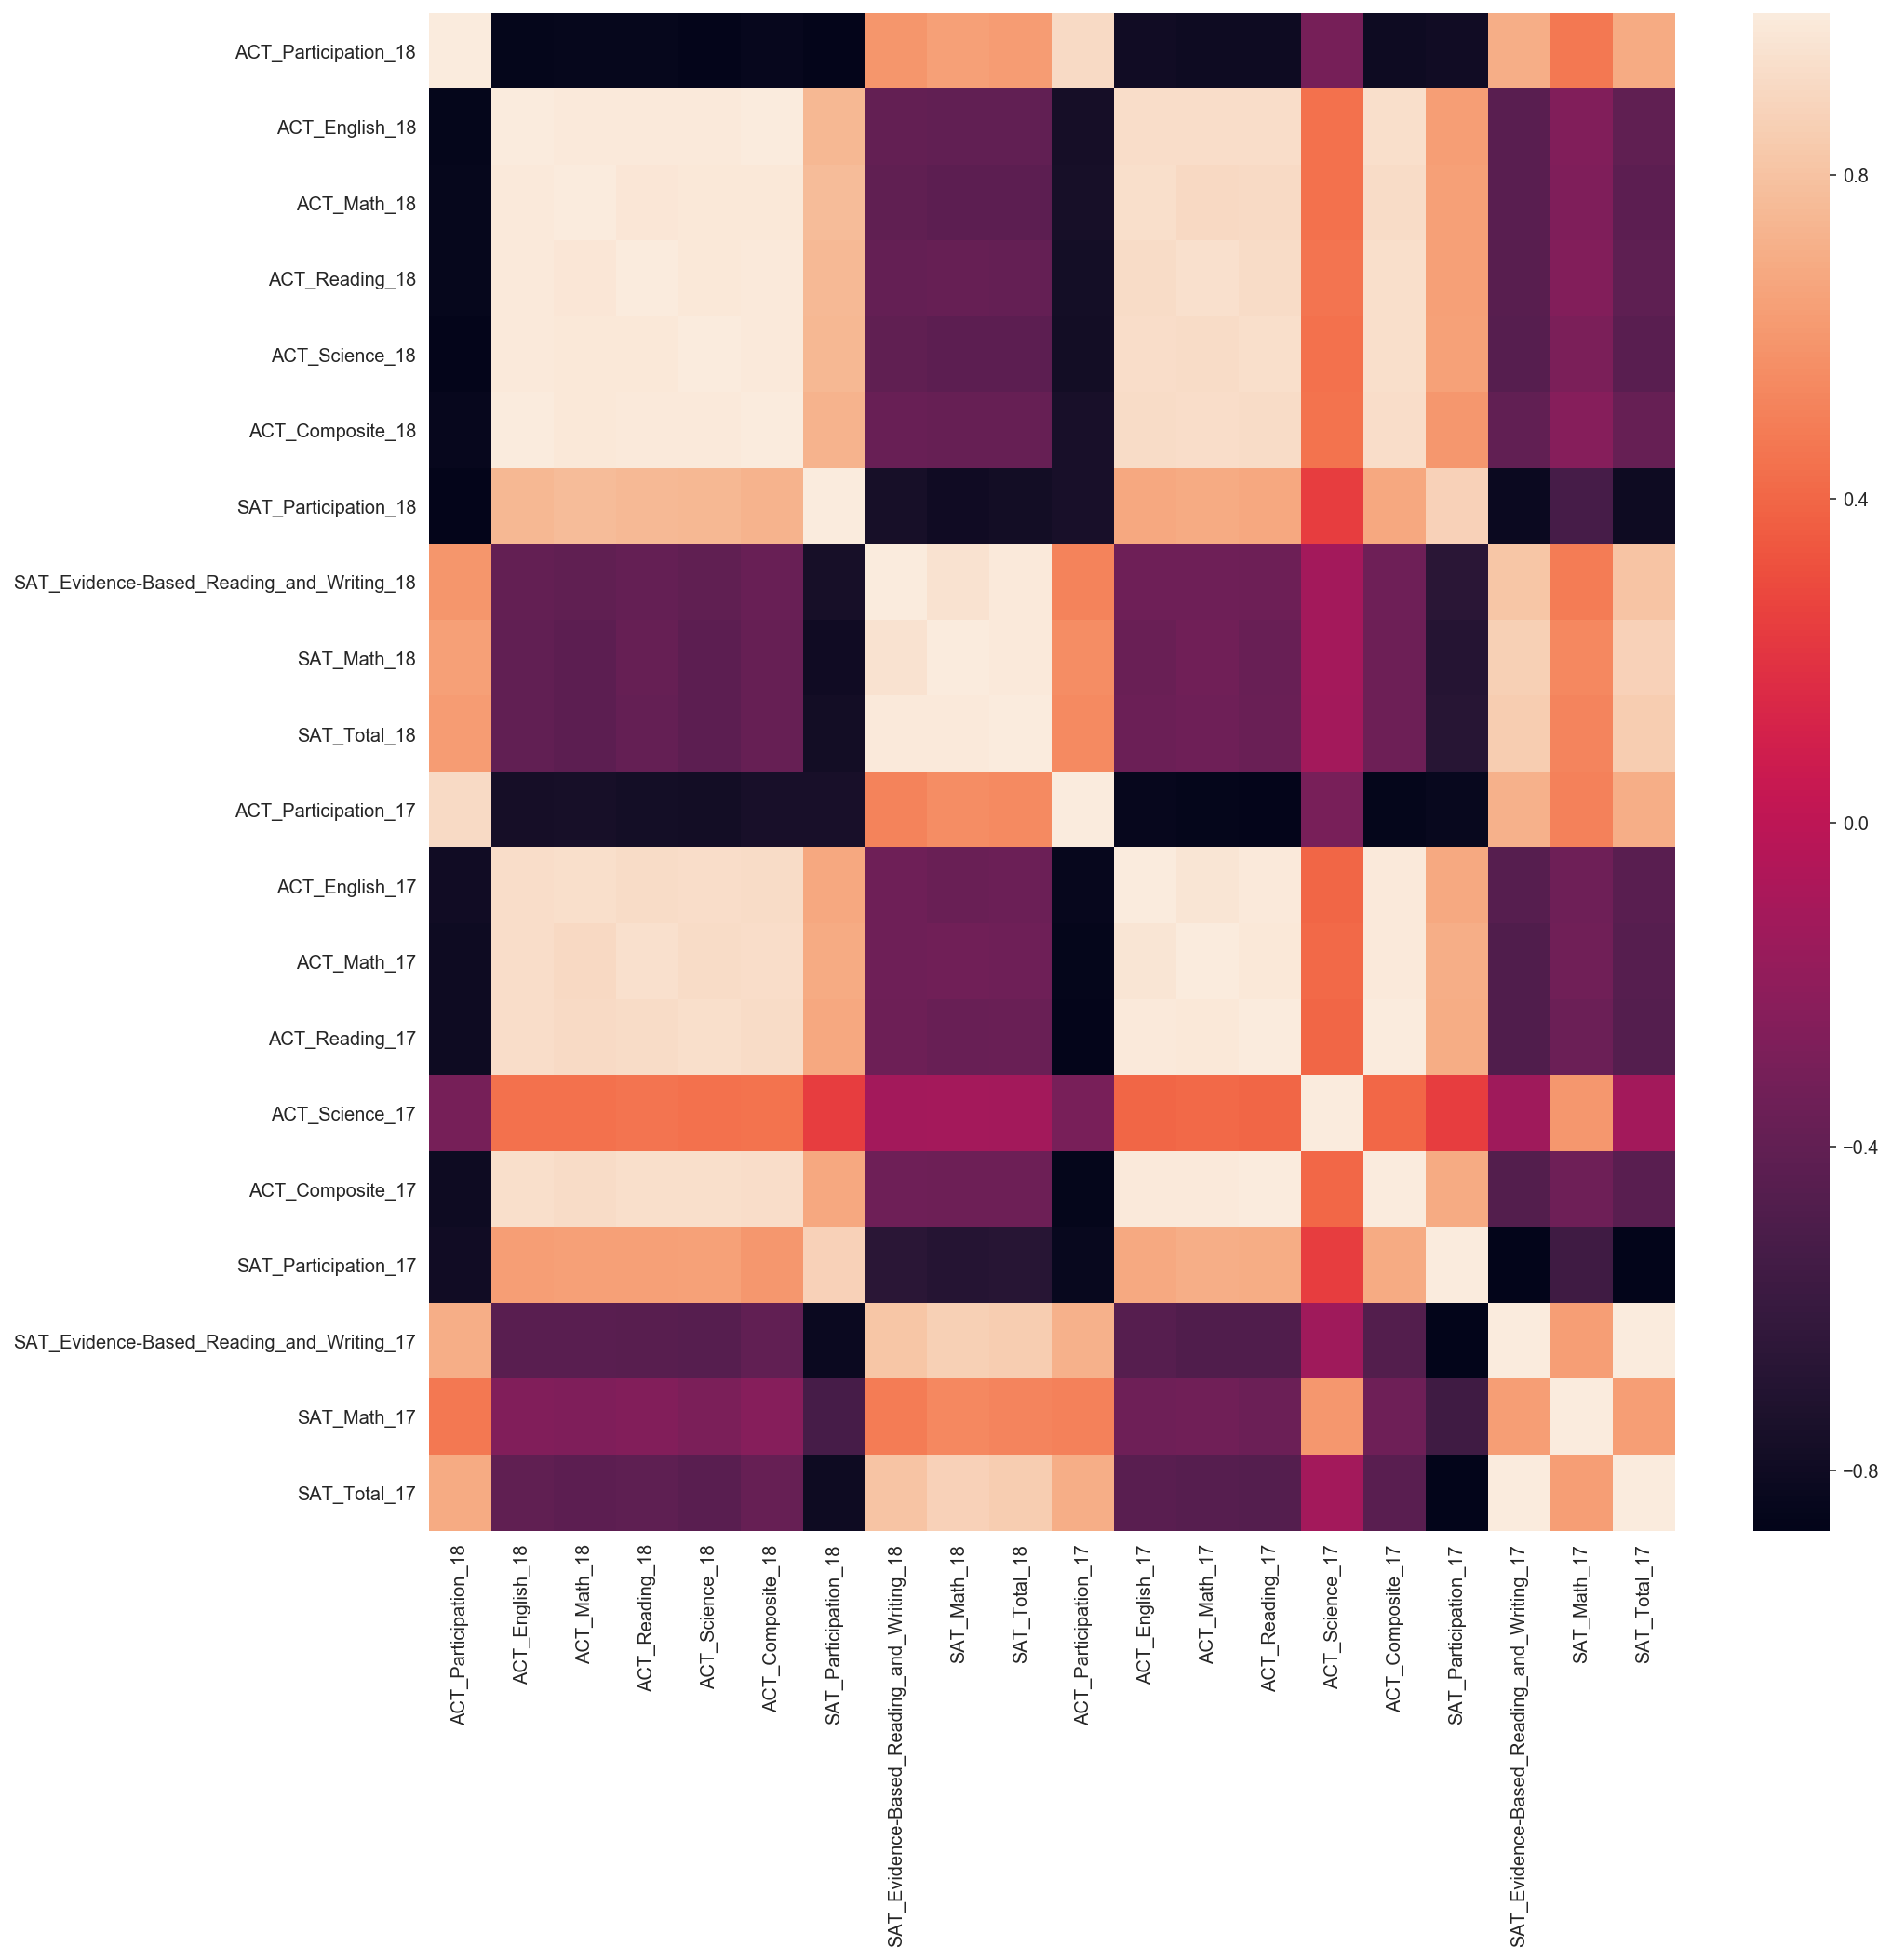

In [74]:
plt.figure(figsize=(15,15))
sns.heatmap(final.corr())

#### Define a custom function to subplot histograms

We have data for two tests for two years. We only have composite (and not subtest scores) for the 2018 ACT. We should write a function that will take the names of 2+ columns and subplot histograms. While you can use pandas plotting or Seaborn here, matplotlib gives you greater control over all aspects of your plots.

[Helpful Link for Plotting Multiple Figures](https://matplotlib.org/users/pyplot_tutorial.html#working-with-multiple-figures-and-axes)

Here's some starter code:

In [75]:
#Defining a histogram plotter function
def subplot_histograms(dataframe, list_of_columns, list_of_titles, list_of_xlabels):
    # Makes sure you have enough rows
    nrows = int(np.ceil(len(list_of_columns)/2)) 
    # You'll want to specify your figsize
    fig, ax = plt.subplots(nrows=nrows, ncols=2) 
    plt.figure(figsize=(15, 20))
    # Ravel turns a matrix into a vector, which is easier to iterate
    ax = ax.ravel() 
    # Gives us an index value to get into all our lists, value of 0,1
    for i, column in enumerate(list_of_columns): 
        # feel free to add more settings
        ax[i].hist(dataframe[column])
        # Set titles for each subplot
        ax[i].set_title((list_of_titles)[i])
        # Set axis for each subplot
        ax[i].set_xlabel((list_of_xlabels)[i])

#### Plot and interpret histograms 
For each of the following:
- Participation rates for SAT & ACT
- Math scores for SAT & ACT
- Reading/verbal scores for SAT & ACT

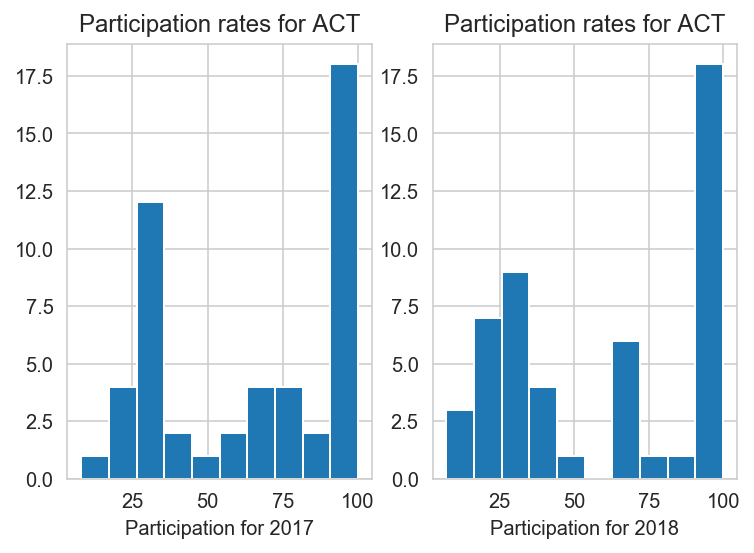

<Figure size 1080x1440 with 0 Axes>

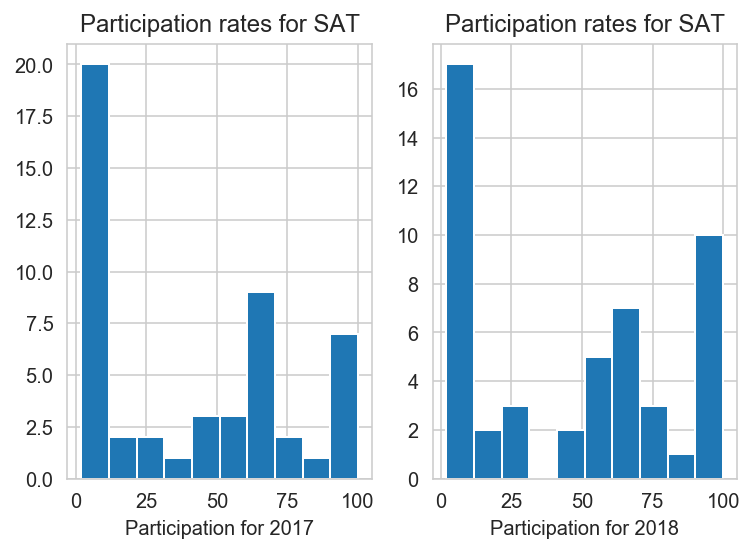

<Figure size 1080x1440 with 0 Axes>

In [76]:
# Plot Participation rates for ACT
column_act=('ACT_Participation_17','ACT_Participation_18')
titles_act = 'Participation rates for ACT','Participation rates for ACT'
x_label_act=('Participation for 2017','Participation for 2018')
subplot_histograms(final_parti,column_act,titles_act,x_label_act)
# Plot Participation rates for SAT
column_act=('SAT_Participation_17','SAT_Participation_18')
titles_act = ('Participation rates for SAT','Participation rates for SAT')
x_label_act=('Participation for 2017','Participation for 2018')
subplot_histograms(final_parti,column_act,titles_act,x_label_act)

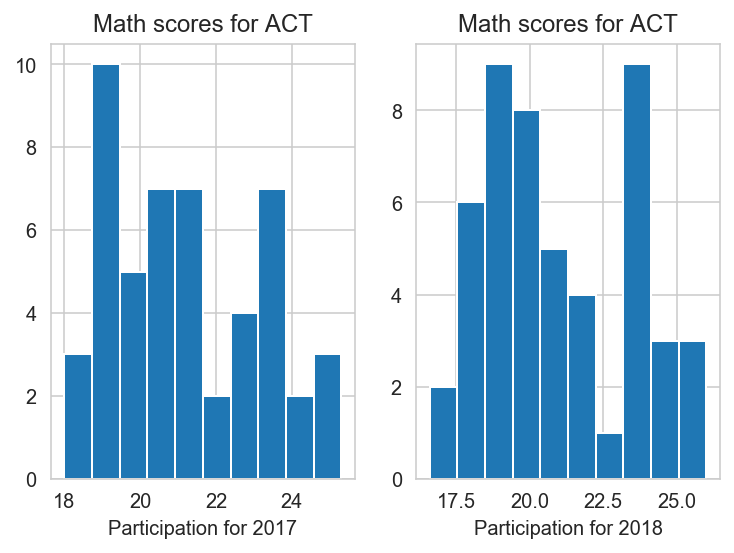

<Figure size 1080x1440 with 0 Axes>

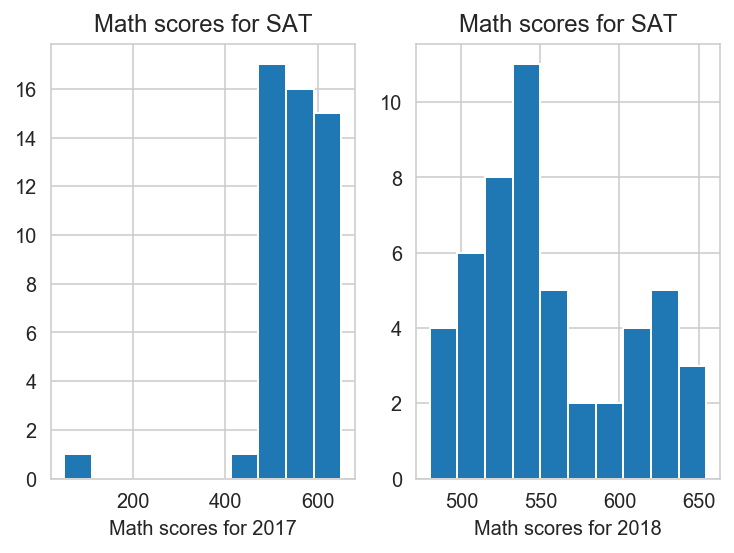

<Figure size 1080x1440 with 0 Axes>

In [77]:
# Plot Math scores for ACT
column_act=('ACT_Math_17','ACT_Math_18')
titles_act = ('Math scores for ACT','Math scores for ACT')
x_label_act=('Participation for 2017','Participation for 2018')
subplot_histograms(final,column_act,titles_act,x_label_act)
# Plot Math scores for SAT
column_act=('SAT_Math_17','SAT_Math_18')
titles_act = ('Math scores for SAT','Math scores for SAT')
x_label_act=('Math scores for 2017','Math scores for 2018')
subplot_histograms(final,column_act,titles_act,x_label_act)

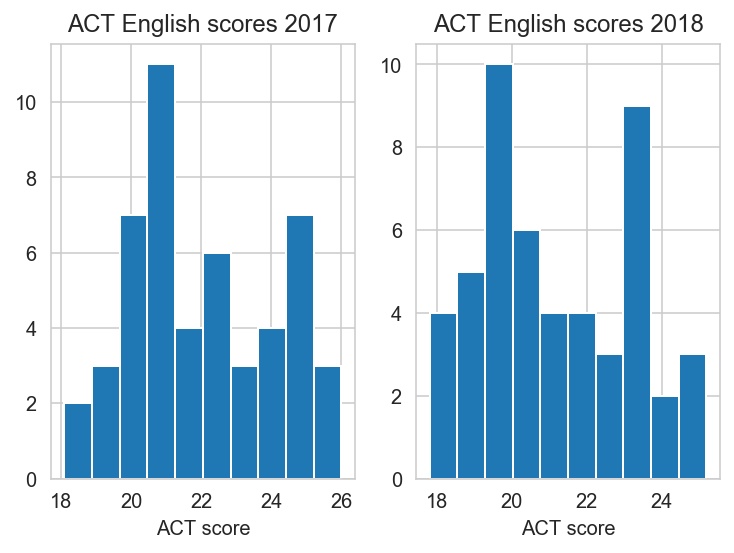

<Figure size 1080x1440 with 0 Axes>

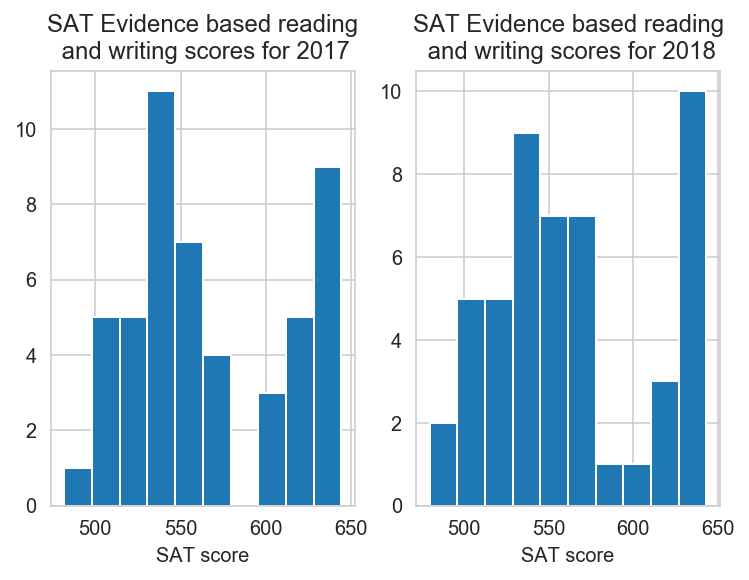

<Figure size 1080x1440 with 0 Axes>

In [78]:
# Plot Reading/verbal scores for ACT
column_act=('ACT_Reading_17','ACT_Reading_18')
titles_act = ('ACT English scores 2017','ACT English scores 2018')
x_label_act=('ACT score','ACT score')
subplot_histograms(final,column_act,titles_act,x_label_act)
# Plot Reading/verbal scores for SAT
column_act=('SAT_Evidence-Based_Reading_and_Writing_17','SAT_Evidence-Based_Reading_and_Writing_18')
titles_act = ('SAT Evidence based reading\n and writing scores for 2017','SAT Evidence based reading\n and writing scores for 2018')
x_label_act=('SAT score','SAT score')
subplot_histograms(final,column_act,titles_act,x_label_act)

#### Plot and interpret scatter plots

For each of the following:
- SAT vs. ACT math scores for 2017
- SAT vs. ACT verbal/reading scores for 2017
- SAT vs. ACT total/composite scores for 2017
- Total scores for SAT 2017 vs. 2018
- Composite scores for ACT 2017 vs. 2018

Plot the two variables against each other using matplotlib or Seaborn

Your plots should show:
- Two clearly labeled axes
- A proper title
- Using colors and symbols that are clear and unmistakable

**Feel free to write a custom function, and subplot if you'd like.** Functions save both time and space.


In [79]:
# Create scatter plot of high prices versus volume.
#Defining a histogram plotter function
def subplot_scatter(list_of_x, list_of_y, titles, xlabels,ylabels):
    plt.figure(figsize=(16, 9))
    plt.scatter(list_of_x, list_of_y)
    plt.title(titles, fontsize = 30)
    plt.ylabel(ylabels, fontsize = 20)
    plt.xlabel(xlabels, fontsize = 20);

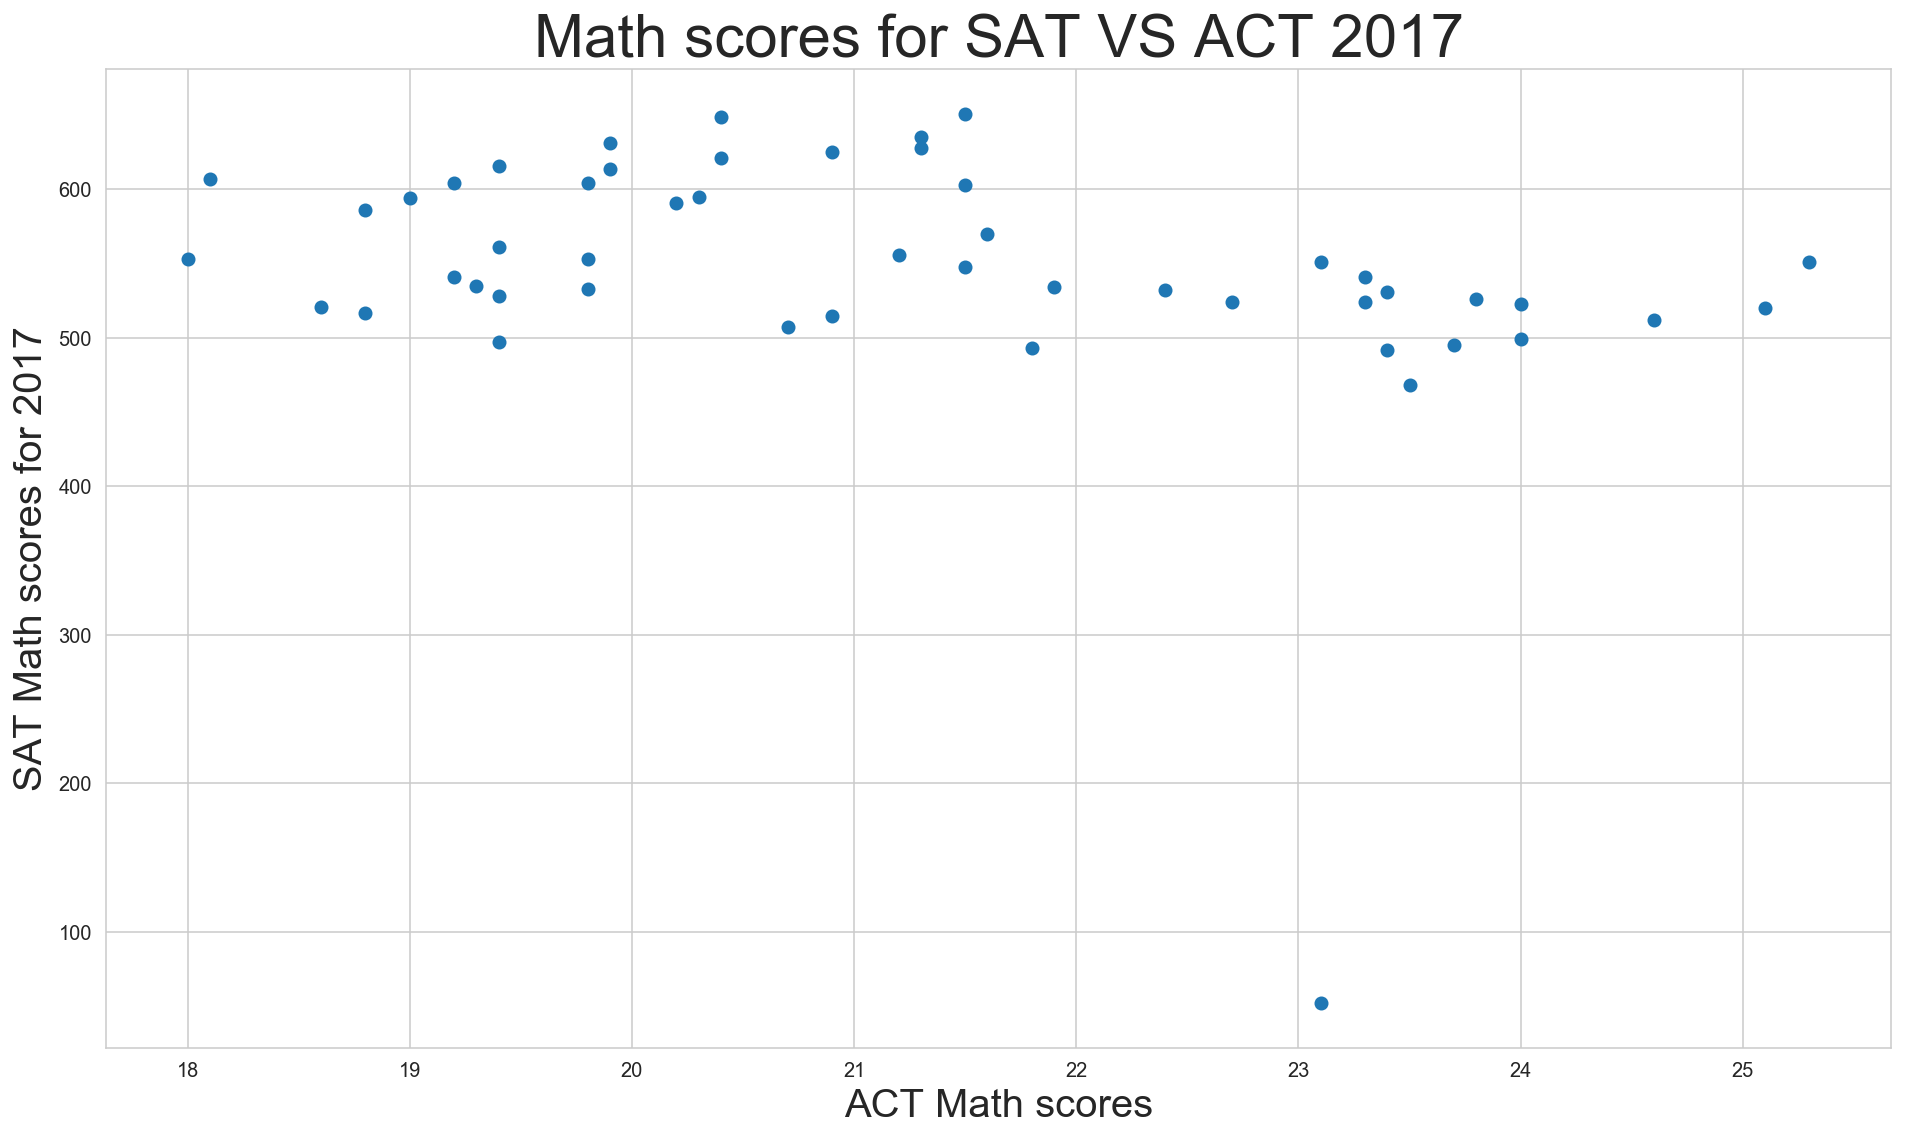

In [80]:
#SAT vs. ACT math scores for 2017
x_act=(final['ACT_Math_17'])
y_act=(final['SAT_Math_17'])
titles_act = ('Math scores for SAT VS ACT 2017')
x_label_act=('ACT Math scores')
y_label_act=('SAT Math scores for 2017')
subplot_scatter(x_act,y_act,titles_act,x_label_act,y_label_act)

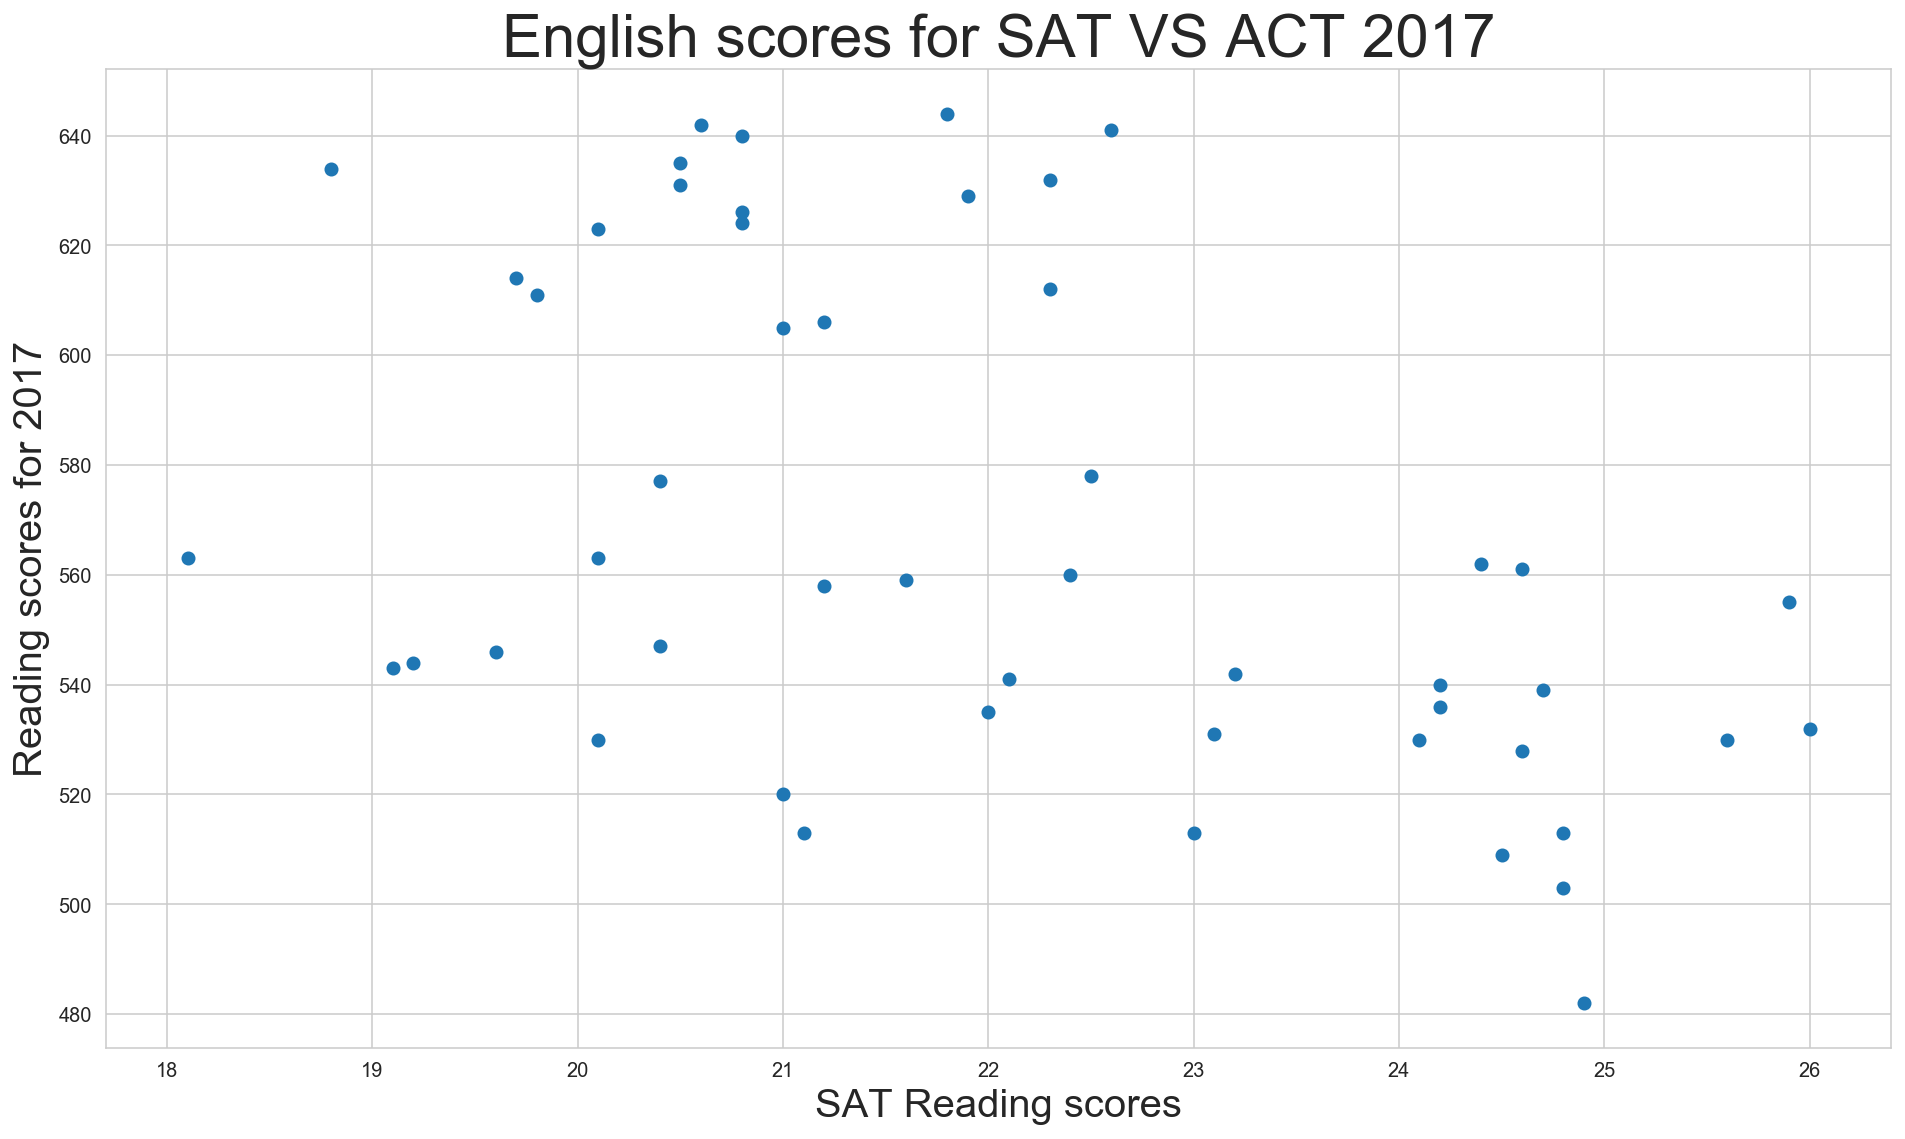

In [81]:
#SAT vs. ACT verbal/reading scores for 2017
x_act=(final['ACT_Reading_17'])
y_act=(final['SAT_Evidence-Based_Reading_and_Writing_17'])
titles_act = ('English scores for SAT VS ACT 2017')
x_label_act=('SAT Reading scores')
y_label_act=('Reading scores for 2017')
subplot_scatter(x_act,y_act,titles_act,x_label_act,y_label_act)

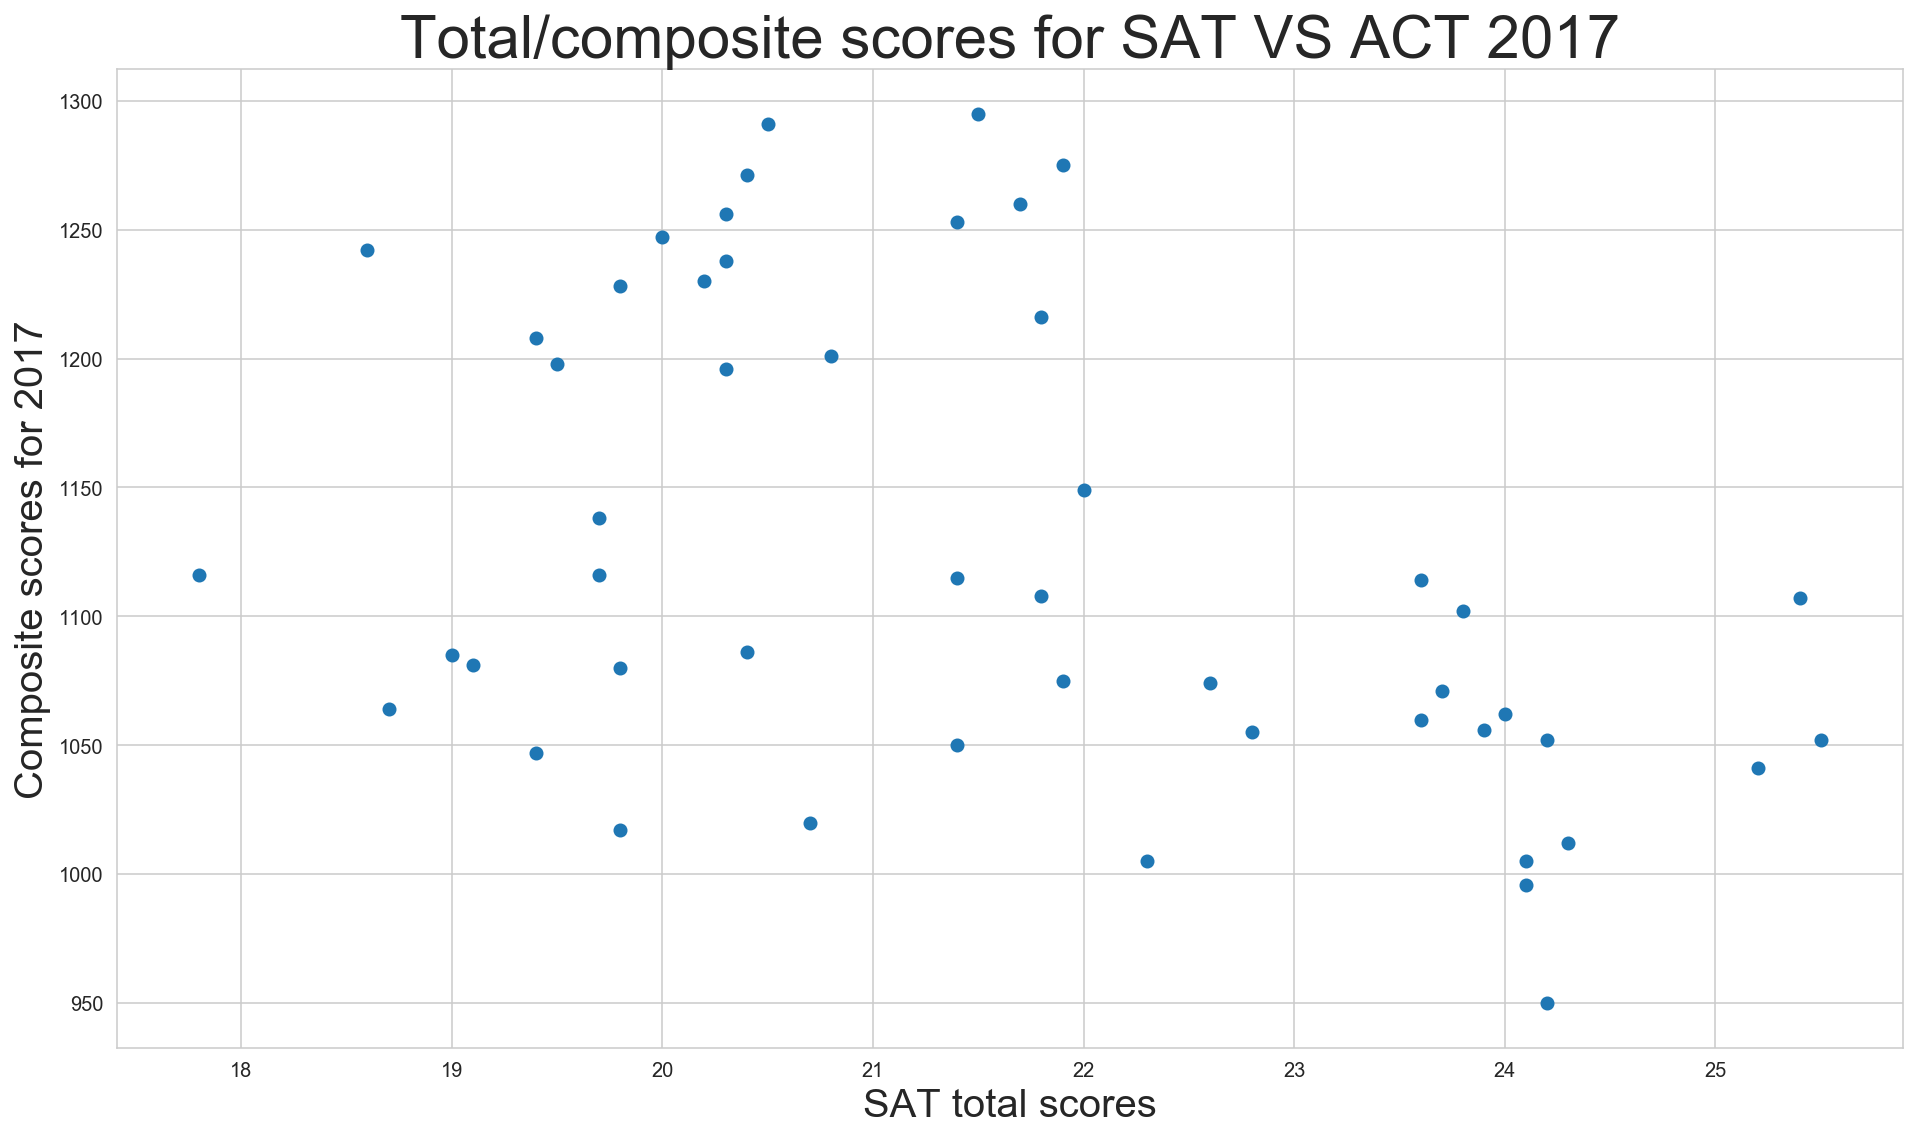

In [82]:
#SAT vs. ACT total/composite scores for 2017
x_act=(final['ACT_Composite_17'])
y_act=(final['SAT_Total_17'])
titles_act = ('Total/composite scores for SAT VS ACT 2017')
x_label_act=('SAT total scores')
y_label_act=('Composite scores for 2017')
subplot_scatter(x_act,y_act,titles_act,x_label_act,y_label_act)

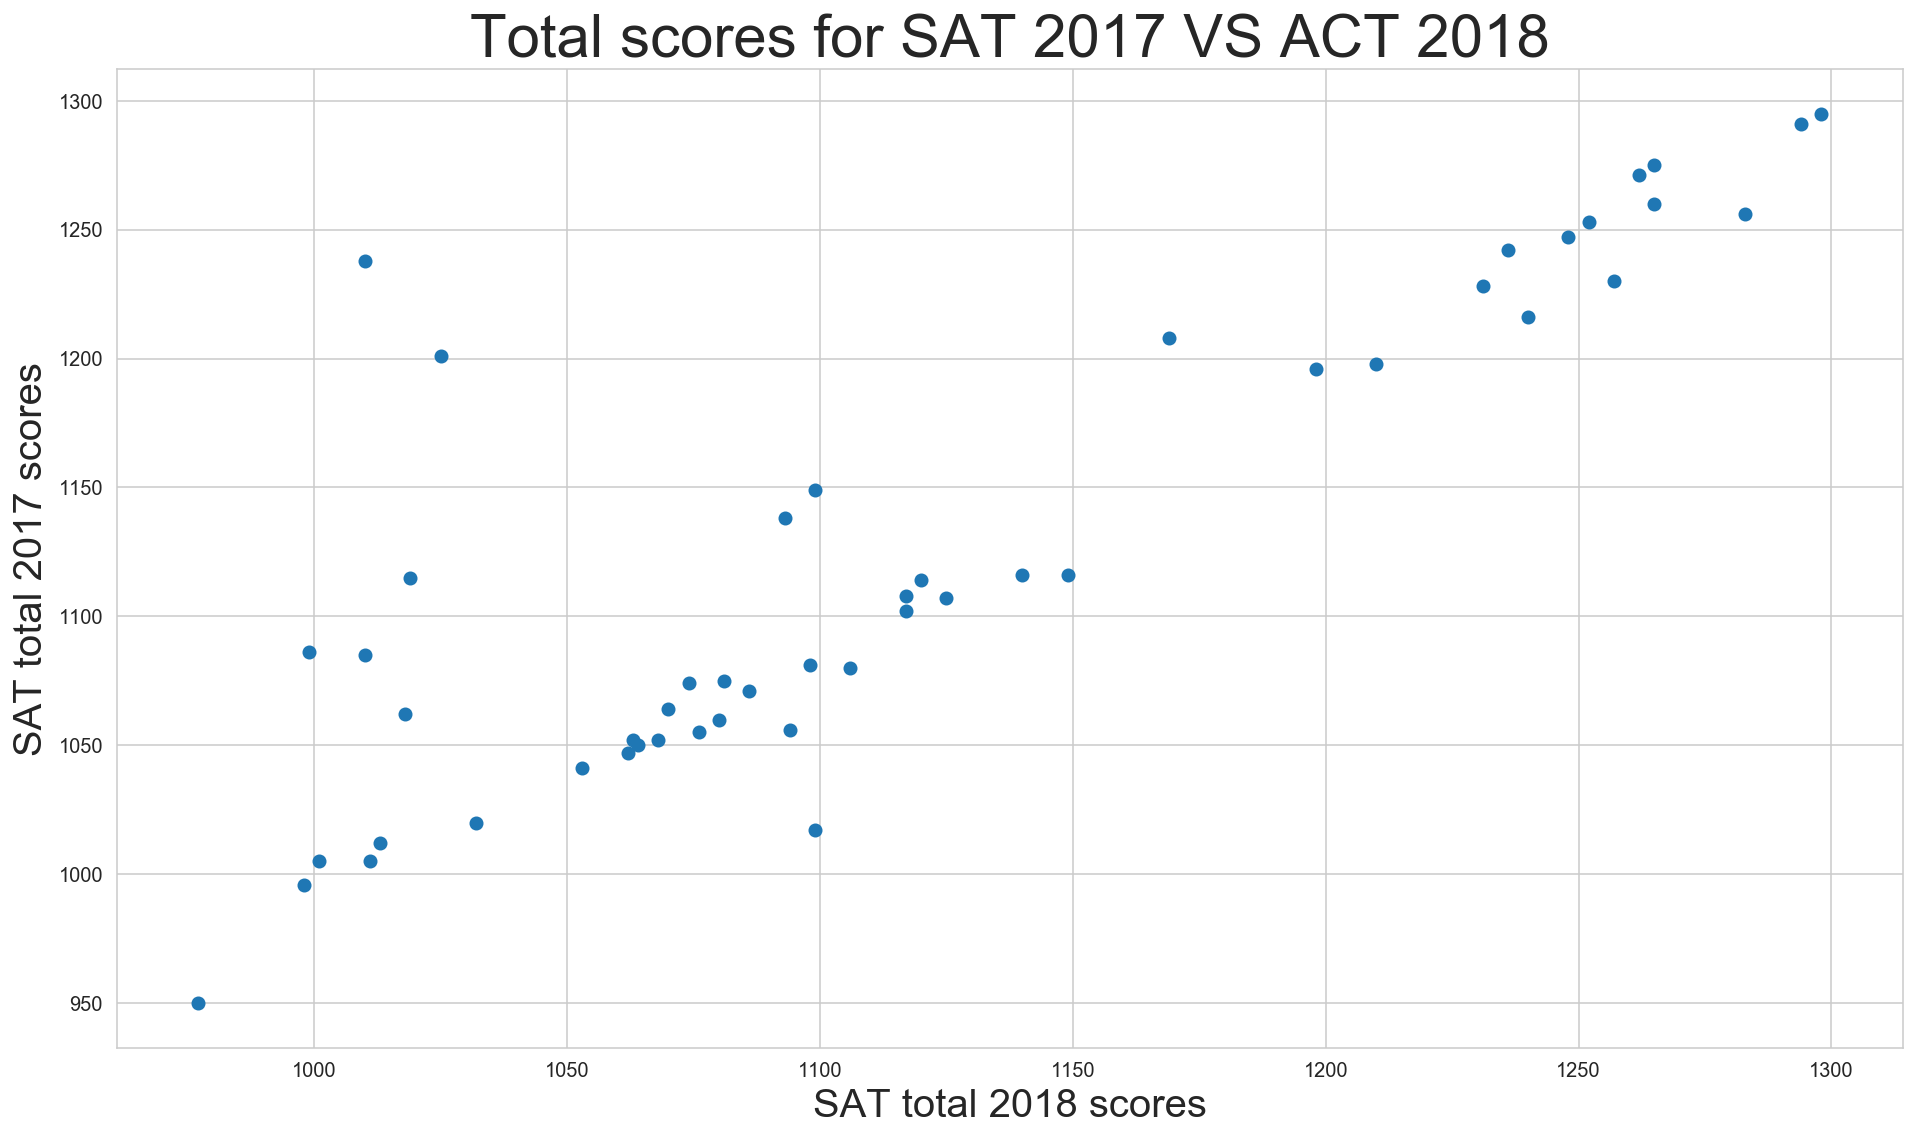

In [83]:
#Total scores for SAT 2017 vs. 2018
x_act=(final['SAT_Total_18'])
y_act=(final['SAT_Total_17'])
titles_act = ('Total scores for SAT 2017 VS ACT 2018')
x_label_act=('SAT total 2018 scores')
y_label_act=('SAT total 2017 scores')
subplot_scatter(x_act,y_act,titles_act,x_label_act,y_label_act)

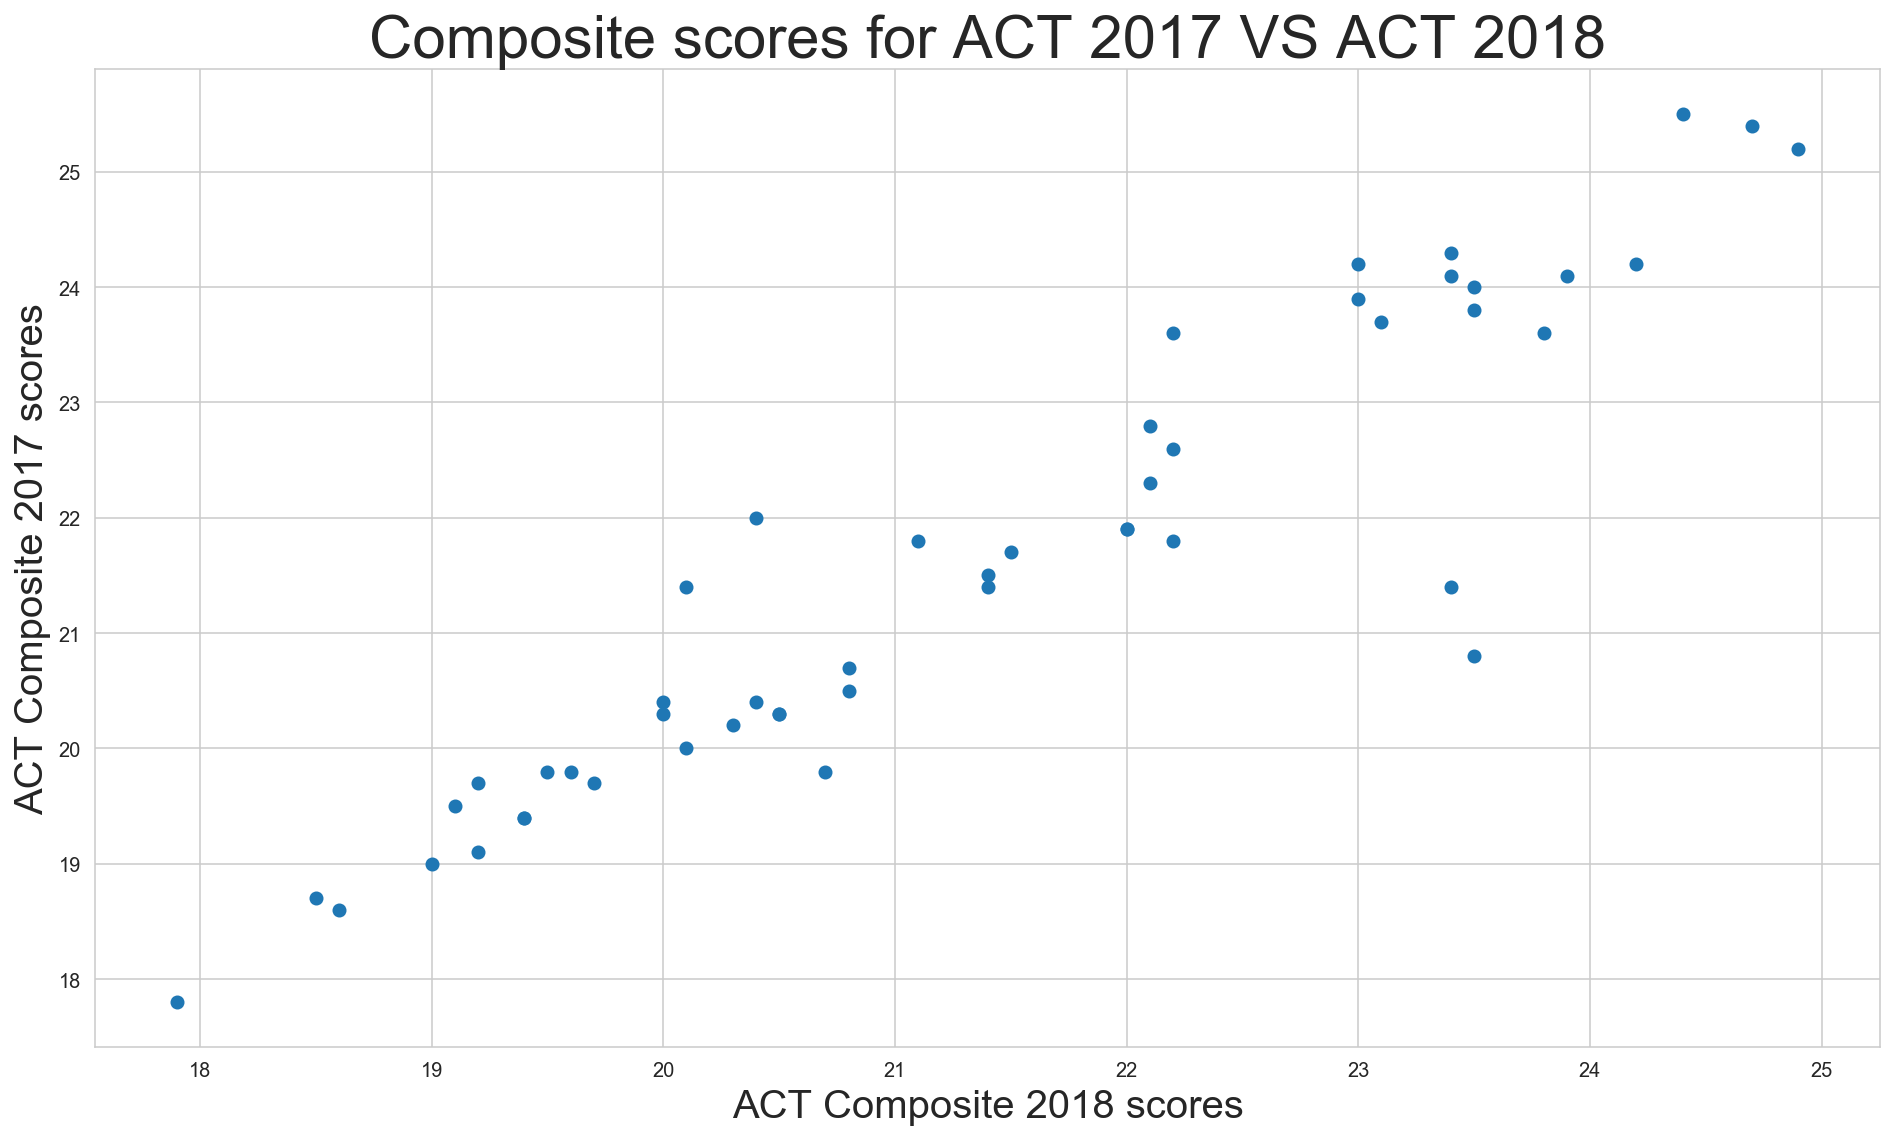

In [84]:
#Composite scores for ACT 2017 vs. 2018
x_act=(final['ACT_Composite_18'])
y_act=(final['ACT_Composite_17'])
titles_act = ('Composite scores for ACT 2017 VS ACT 2018')
x_label_act=('ACT Composite 2018 scores')
y_label_act=('ACT Composite 2017 scores')
subplot_scatter(x_act,y_act,titles_act,x_label_act,y_label_act)

#### Plot and interpret boxplots

For each numeric variable in the dataframe create a boxplot using Seaborn. Boxplots demonstrate central tendency and spread in variables. In a certain sense, these are somewhat redundant with histograms, but you may be better able to identify clear outliers or differences in IQR, etc.

Multiple values can be plotted to a single boxplot as long as they are of the same relative scale (meaning they have similar min/max values).

Each boxplot should:
- Only include variables of a similar scale
- Have clear labels for each variable
- Have appropriate titles and labels

In [85]:
final.head(0)

,State,ACT_Participation_18,ACT_English_18,ACT_Math_18,ACT_Reading_18,ACT_Science_18,ACT_Composite_18,SAT_Participation_18,SAT_Evidence-Based_Reading_and_Writing_18,SAT_Math_18,...,ACT_Participation_17,ACT_English_17,ACT_Math_17,ACT_Reading_17,ACT_Science_17,ACT_Composite_17,SAT_Participation_17,SAT_Evidence-Based_Reading_and_Writing_17,SAT_Math_17,SAT_Total_17


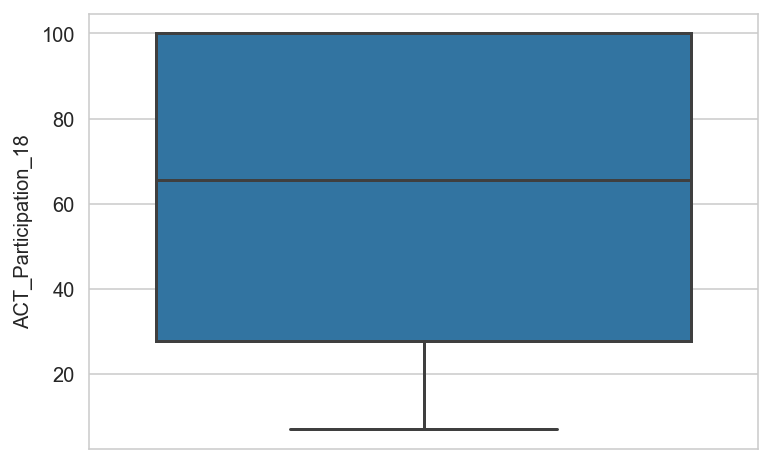

In [86]:
# ACT_Participation_18
sns.boxplot(final['ACT_Participation_18'],orient='v')

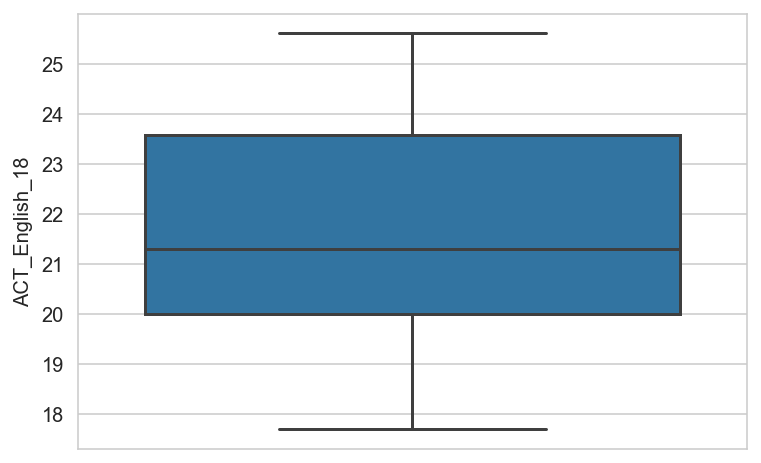

In [87]:
#ACT_English_18
sns.boxplot(final['ACT_English_18'],orient='v')

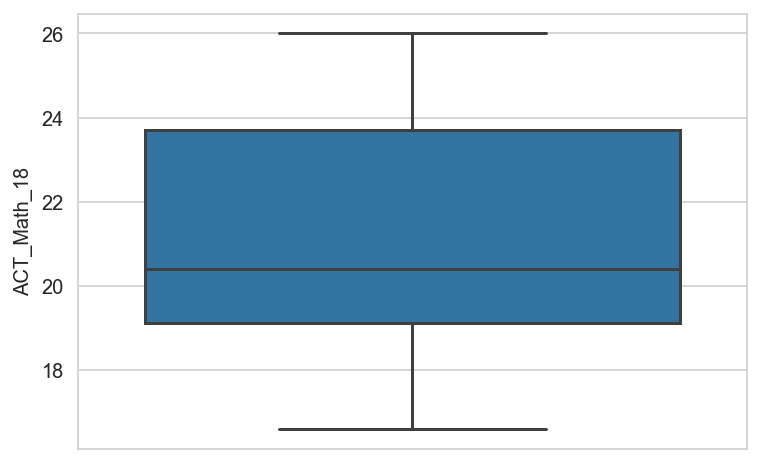

In [88]:
#ACT_Math_18
sns.boxplot(final['ACT_Math_18'],orient='v')

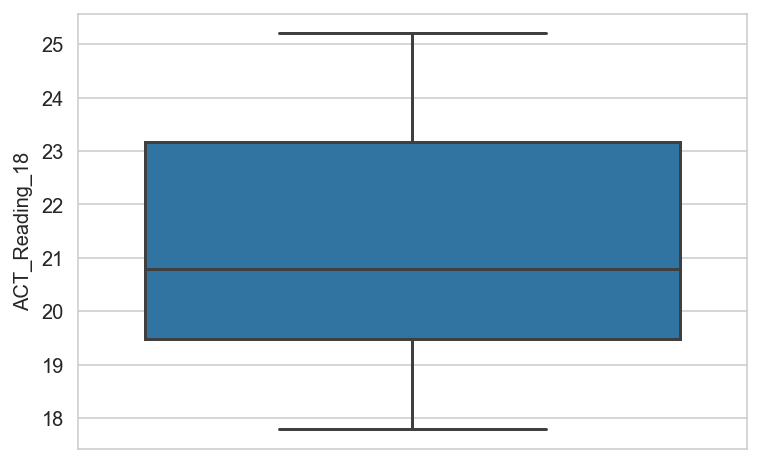

In [89]:
#ACT_Reading_18
sns.boxplot(final['ACT_Reading_18'],orient='v')

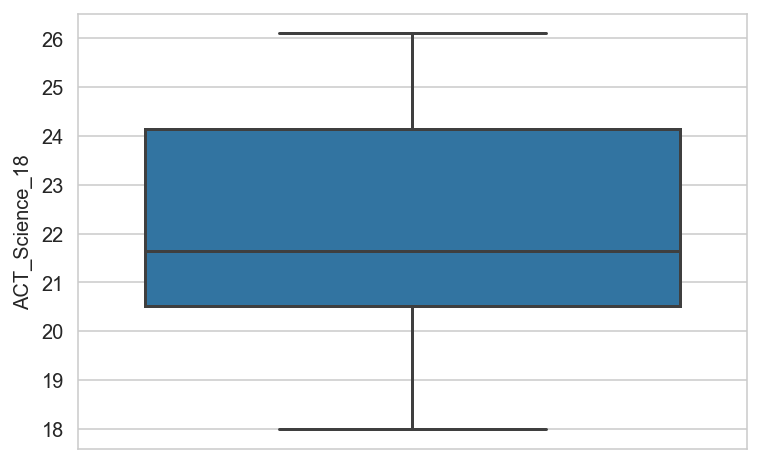

In [90]:
#ACT_Science_18
sns.boxplot(final['ACT_Science_18'],orient='v')

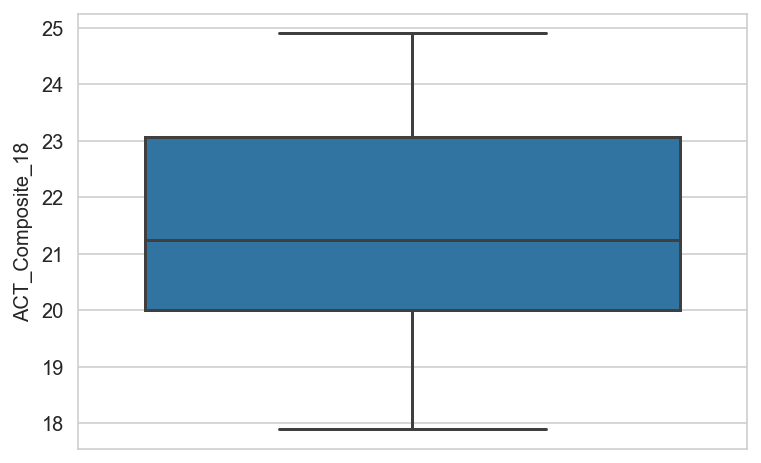

In [91]:
#ACT_Composite_18
sns.boxplot(final['ACT_Composite_18'],orient='v')

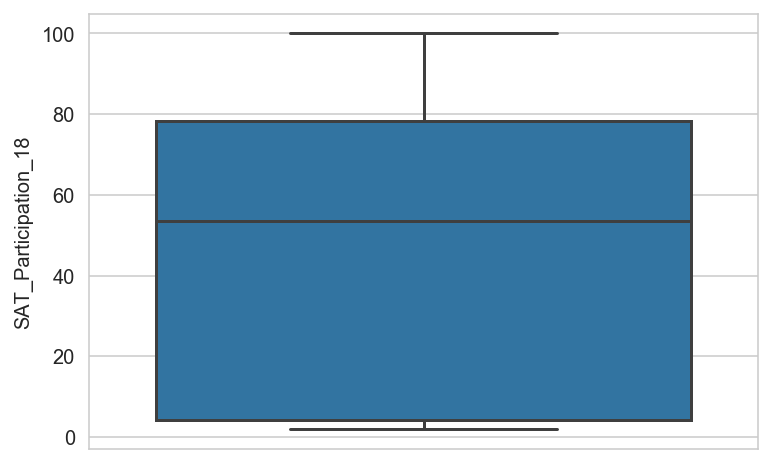

In [92]:
#SAT_Participation_18
sns.boxplot(final['SAT_Participation_18'],orient='v')

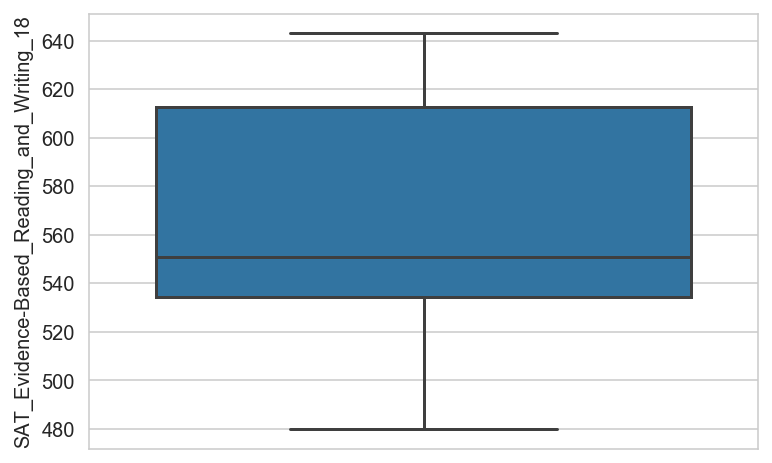

In [93]:
#SAT_Evidence-Based_Reading_and_Writing_18	
sns.boxplot(final['SAT_Evidence-Based_Reading_and_Writing_18'],orient='v')

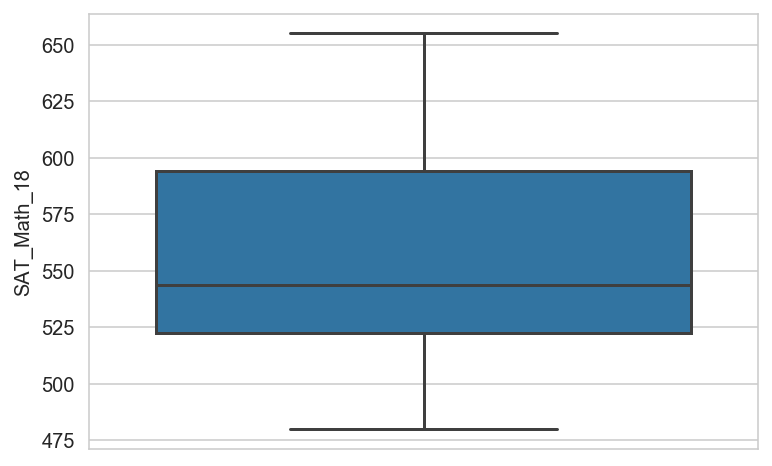

In [94]:
#SAT_Math_18
sns.boxplot(final['SAT_Math_18'],orient='v')

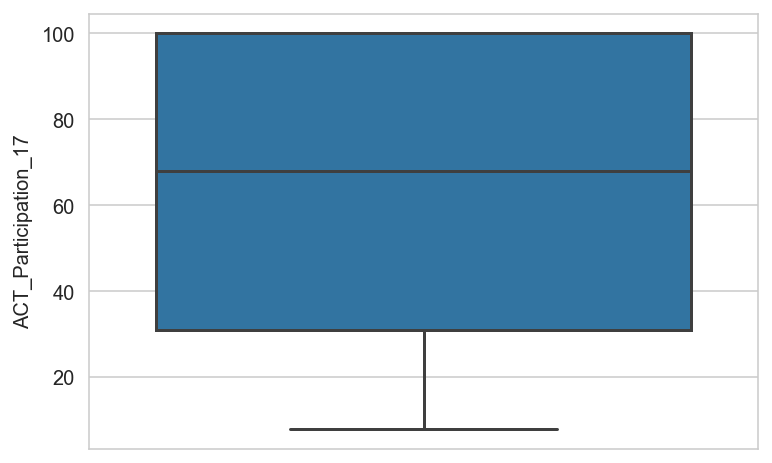

In [95]:
#ACT_Participation_17
sns.boxplot(final['ACT_Participation_17'],orient='v')

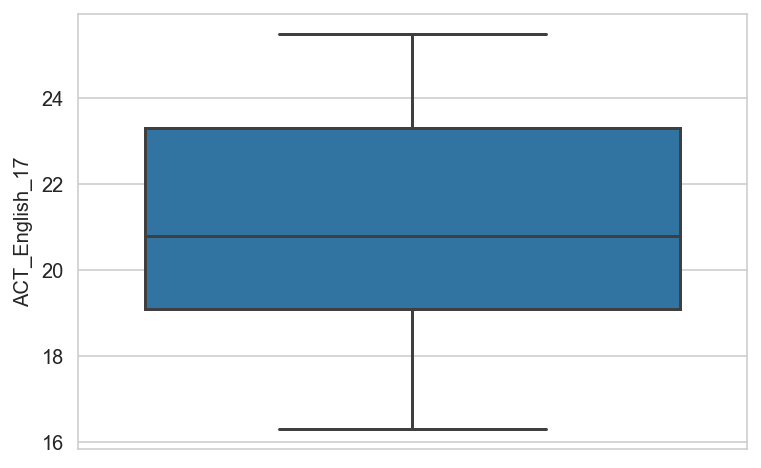

In [96]:
#ACT_English_17
sns.boxplot(final['ACT_English_17'],orient='v')

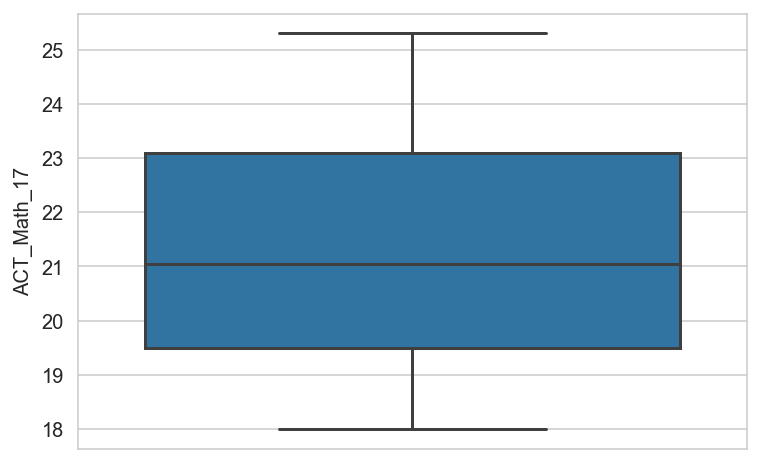

In [97]:
#ACT_Math_17
sns.boxplot(final['ACT_Math_17'],orient='v')

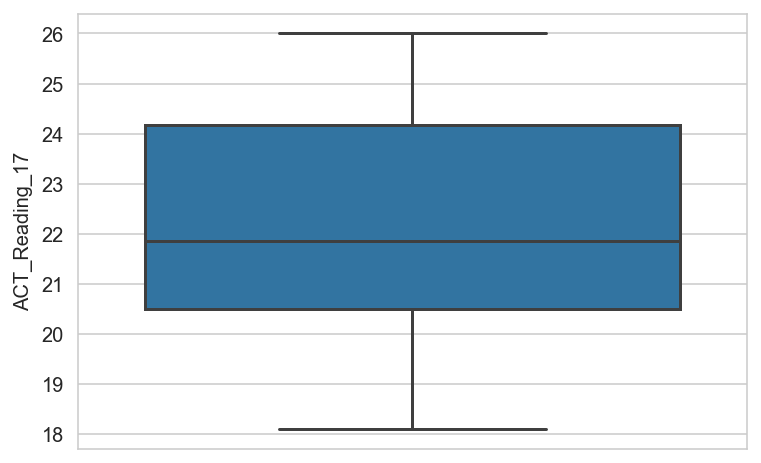

In [98]:
#ACT_Reading_17
sns.boxplot(final['ACT_Reading_17'],orient='v')

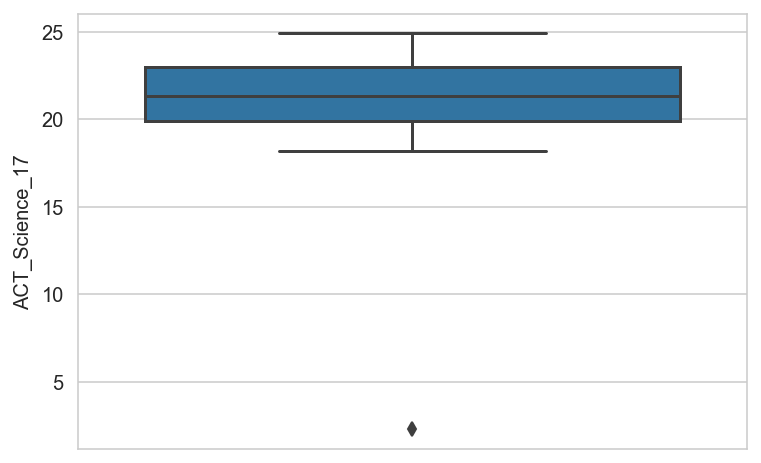

In [99]:
#ACT_Science_17
sns.boxplot(final['ACT_Science_17'],orient='v')

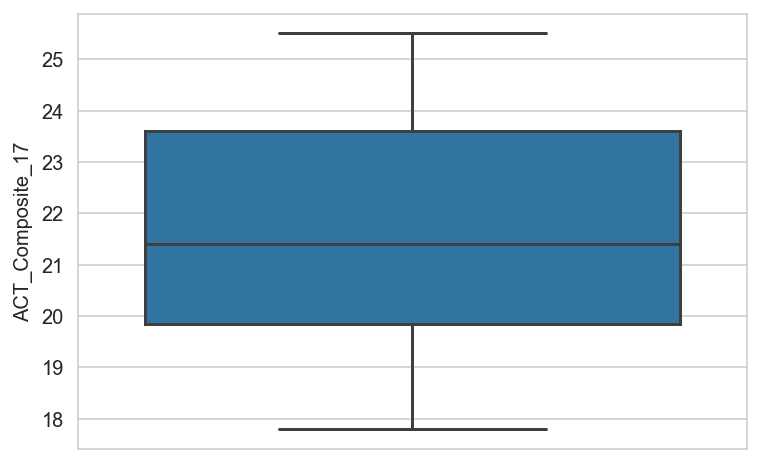

In [100]:
#ACT_Composite_17
sns.boxplot(final['ACT_Composite_17'],orient='v')

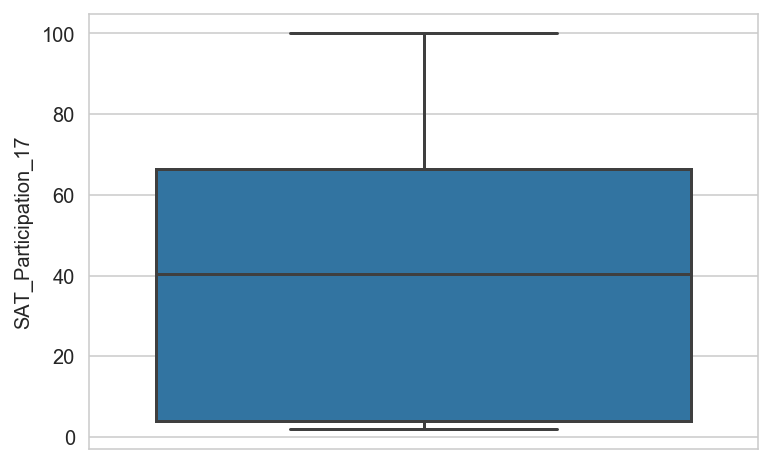

In [101]:
#SAT_Participation_17
sns.boxplot(final['SAT_Participation_17'],orient='v')

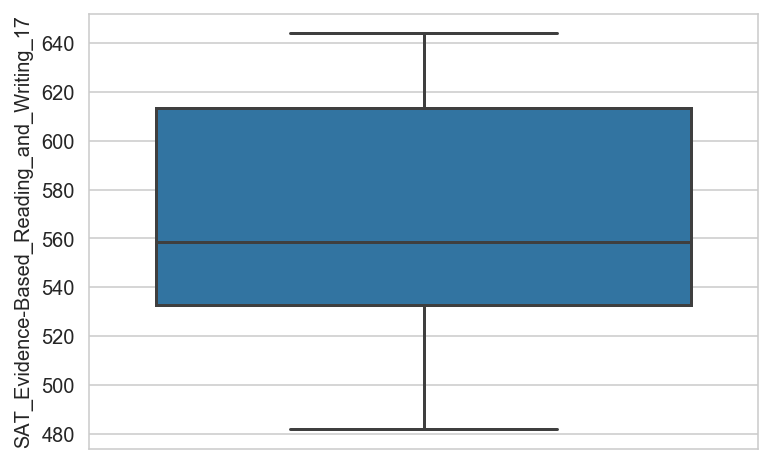

In [102]:
#SAT_Evidence-Based_Reading_and_Writing_17
sns.boxplot(final['SAT_Evidence-Based_Reading_and_Writing_17'],orient='v')

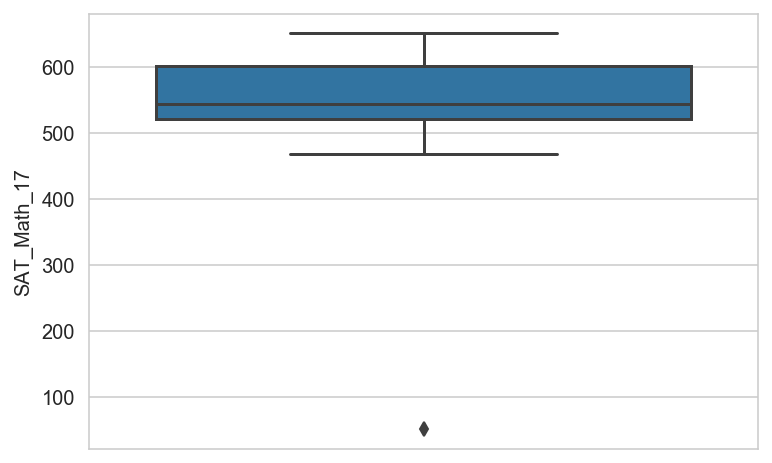

In [103]:
#SAT_Math_17
sns.boxplot(final['SAT_Math_17'],orient='v')

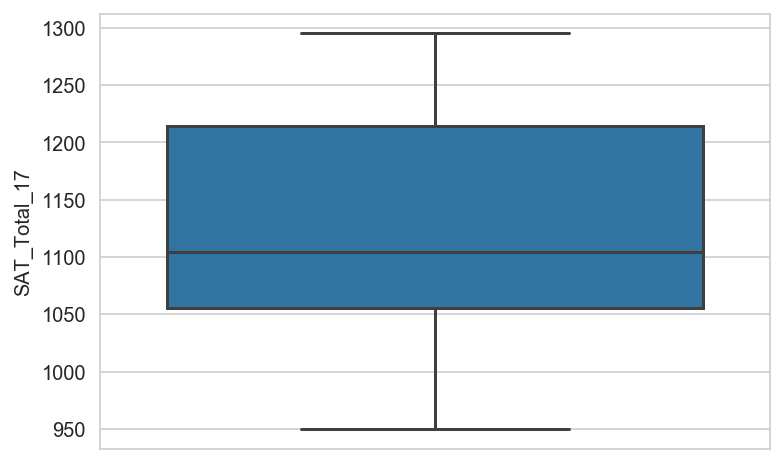

In [104]:
#SAT_Total_17
sns.boxplot(final['SAT_Total_17'],orient='v')

#### Feel free to do additional plots below
*(do research and choose your own chart types & variables)*

Are there any additional trends or relationships you haven't explored? Was there something interesting you saw that you'd like to dive further into? It's likely that there are a few more plots you might want to generate to support your narrative and recommendations that you are building toward. **As always, make sure you're interpreting your plots as you go**.

#### (Optional): Using Tableau, create a choropleth map for each variable using a map of the US. 

Save this plot as an image file in an images directory, provide a relative path, and insert the image into notebook in markdown.

Nope, no time for tableau

## Descriptive and Inferential Statistics

#### Summarizing Distributions

Above, we used pandas `describe` to provide quick summary statistics of our numeric columns. We also demonstrated many visual relationships.

As data scientists, having a complete understanding of data is imperative prior to modeling.

While we will continue to build our analytic tools, we know that measures of *central tendency*, *spread*, and *shape/skewness* provide a quick summary of distributions.

For each variable in your data, summarize the underlying distributions (in words & statistics)
 - Be thorough in your verbal description of these distributions.
 - Be sure to back up these summaries with statistics.

**Answers:**
- All Variables follow a discreet Probability Distribution.
- All numeric Variables follow a Binomial Distribution



#### We generally assuming that data we sample from a population will be normally distributed. Do we observe this trend?

Answer:


Does This Assumption Hold for:
    - Math
    - Reading
    - Rates
Explain your answers for each distribution and how you think this will affect estimates made from these data.

Answer:
Maths, Rates Reading have a limited range of values.

#### Estimate Limits of Data

Suppose we only seek to understand the relationship between SAT and ACT participation rates in 2017. 

##### Does it make sense to conduct statistical inference given these data specifically? 

Why or why not?

*(think about granularity, aggregation, the relationships between populations size & rates...consider the actually populations these data describe in answering this question)*

Answer:

##### Is it appropriate to compare *these* specific SAT and ACT math scores? 

Why or why not?

**Answer:**
---
No,<br>
    -Both SAT & ACT have different max total value<br>
    -SAT Math and ACT Math are at best inversely correlated even thou it is the same topic

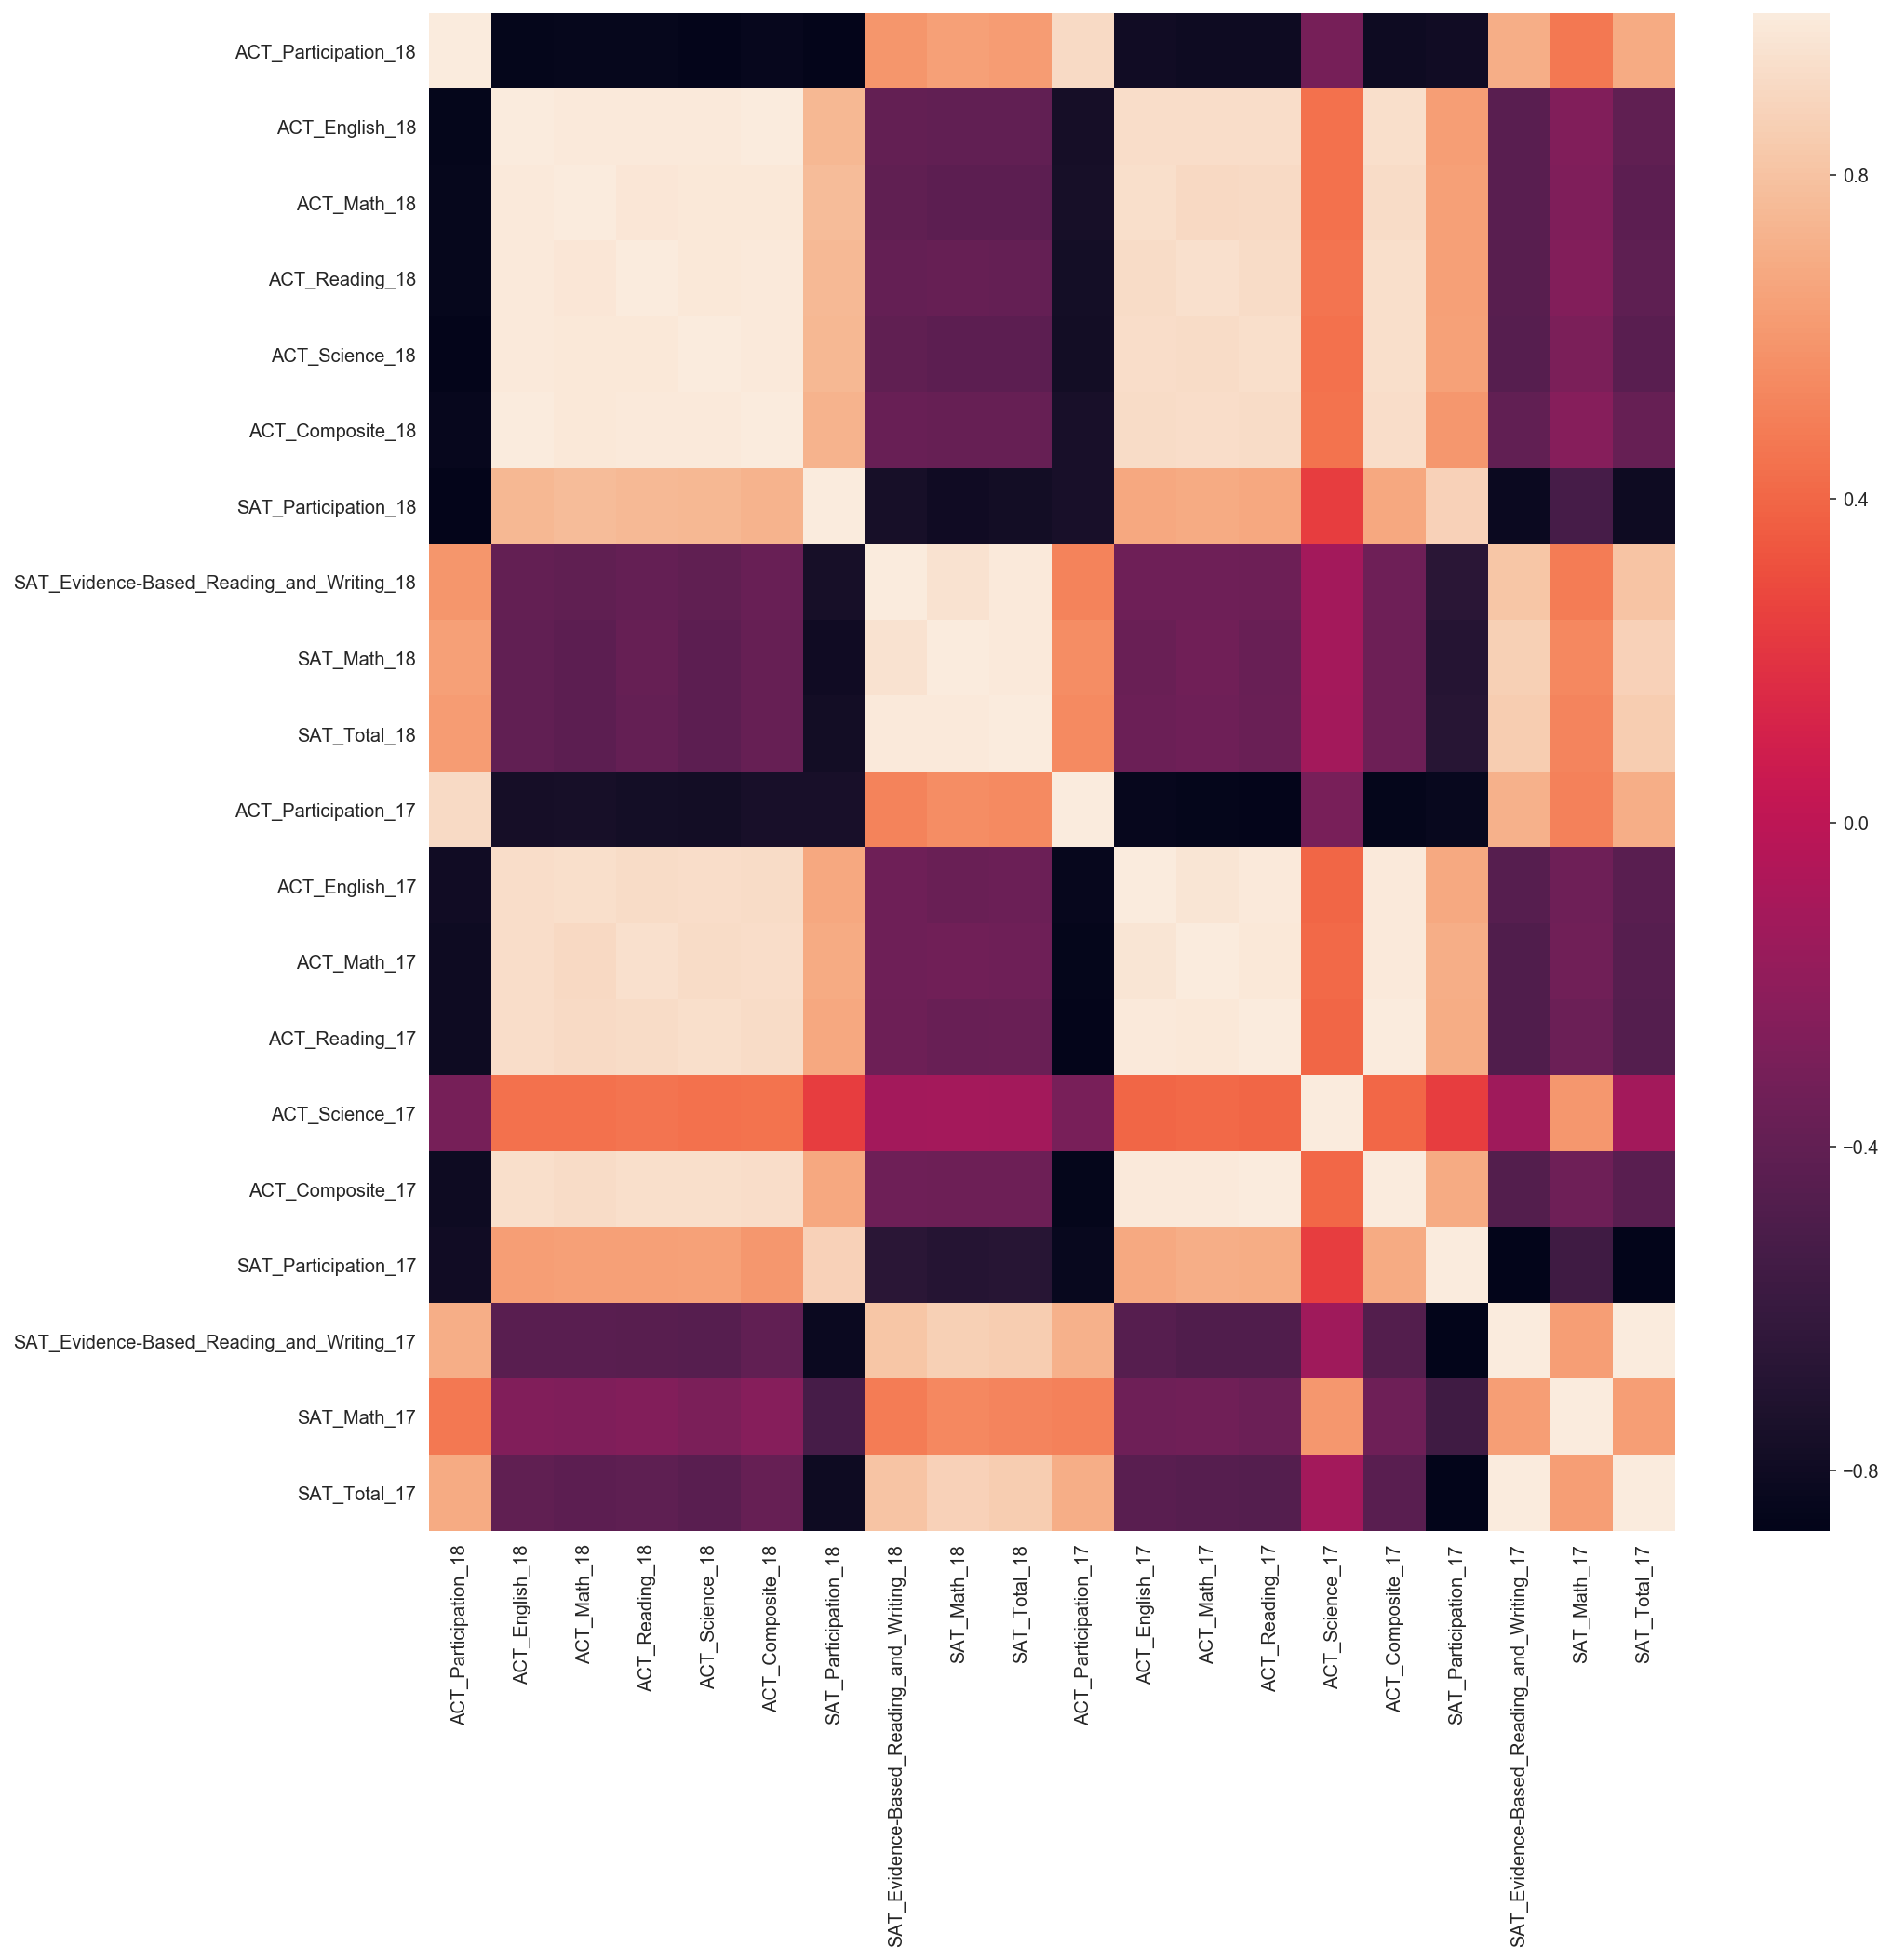

In [106]:
plt.figure(figsize=(15,15))
sns.heatmap(final.corr())

#### Statistical Evaluation of Distributions 

**If you feel it's appropriate**, using methods we discussed in class, run hypothesis tests to compare variables of interest in our dataset. 

In [107]:
# Code:

## Outside Research

Based upon your observations, choose **three** states that demonstrate interesting trends in their SAT and/or ACT participation rates. Spend some time doing outside research on state policies that might influence these rates, and summarize your findings below. **Feel free to go back and create new plots that highlight these states of interest**. If you bring in any outside tables or charts, make sure you are explicit about having borrowed them. If you quote any text, make sure that it renders as being quoted. (Make sure that you cite your sources -- check with you local instructor for citation preferences).

**Answer:**
There is a correlation between participantion rates and mean score of maths 
See graph below:<br>
The correlation for participation and other numeric values is correlated

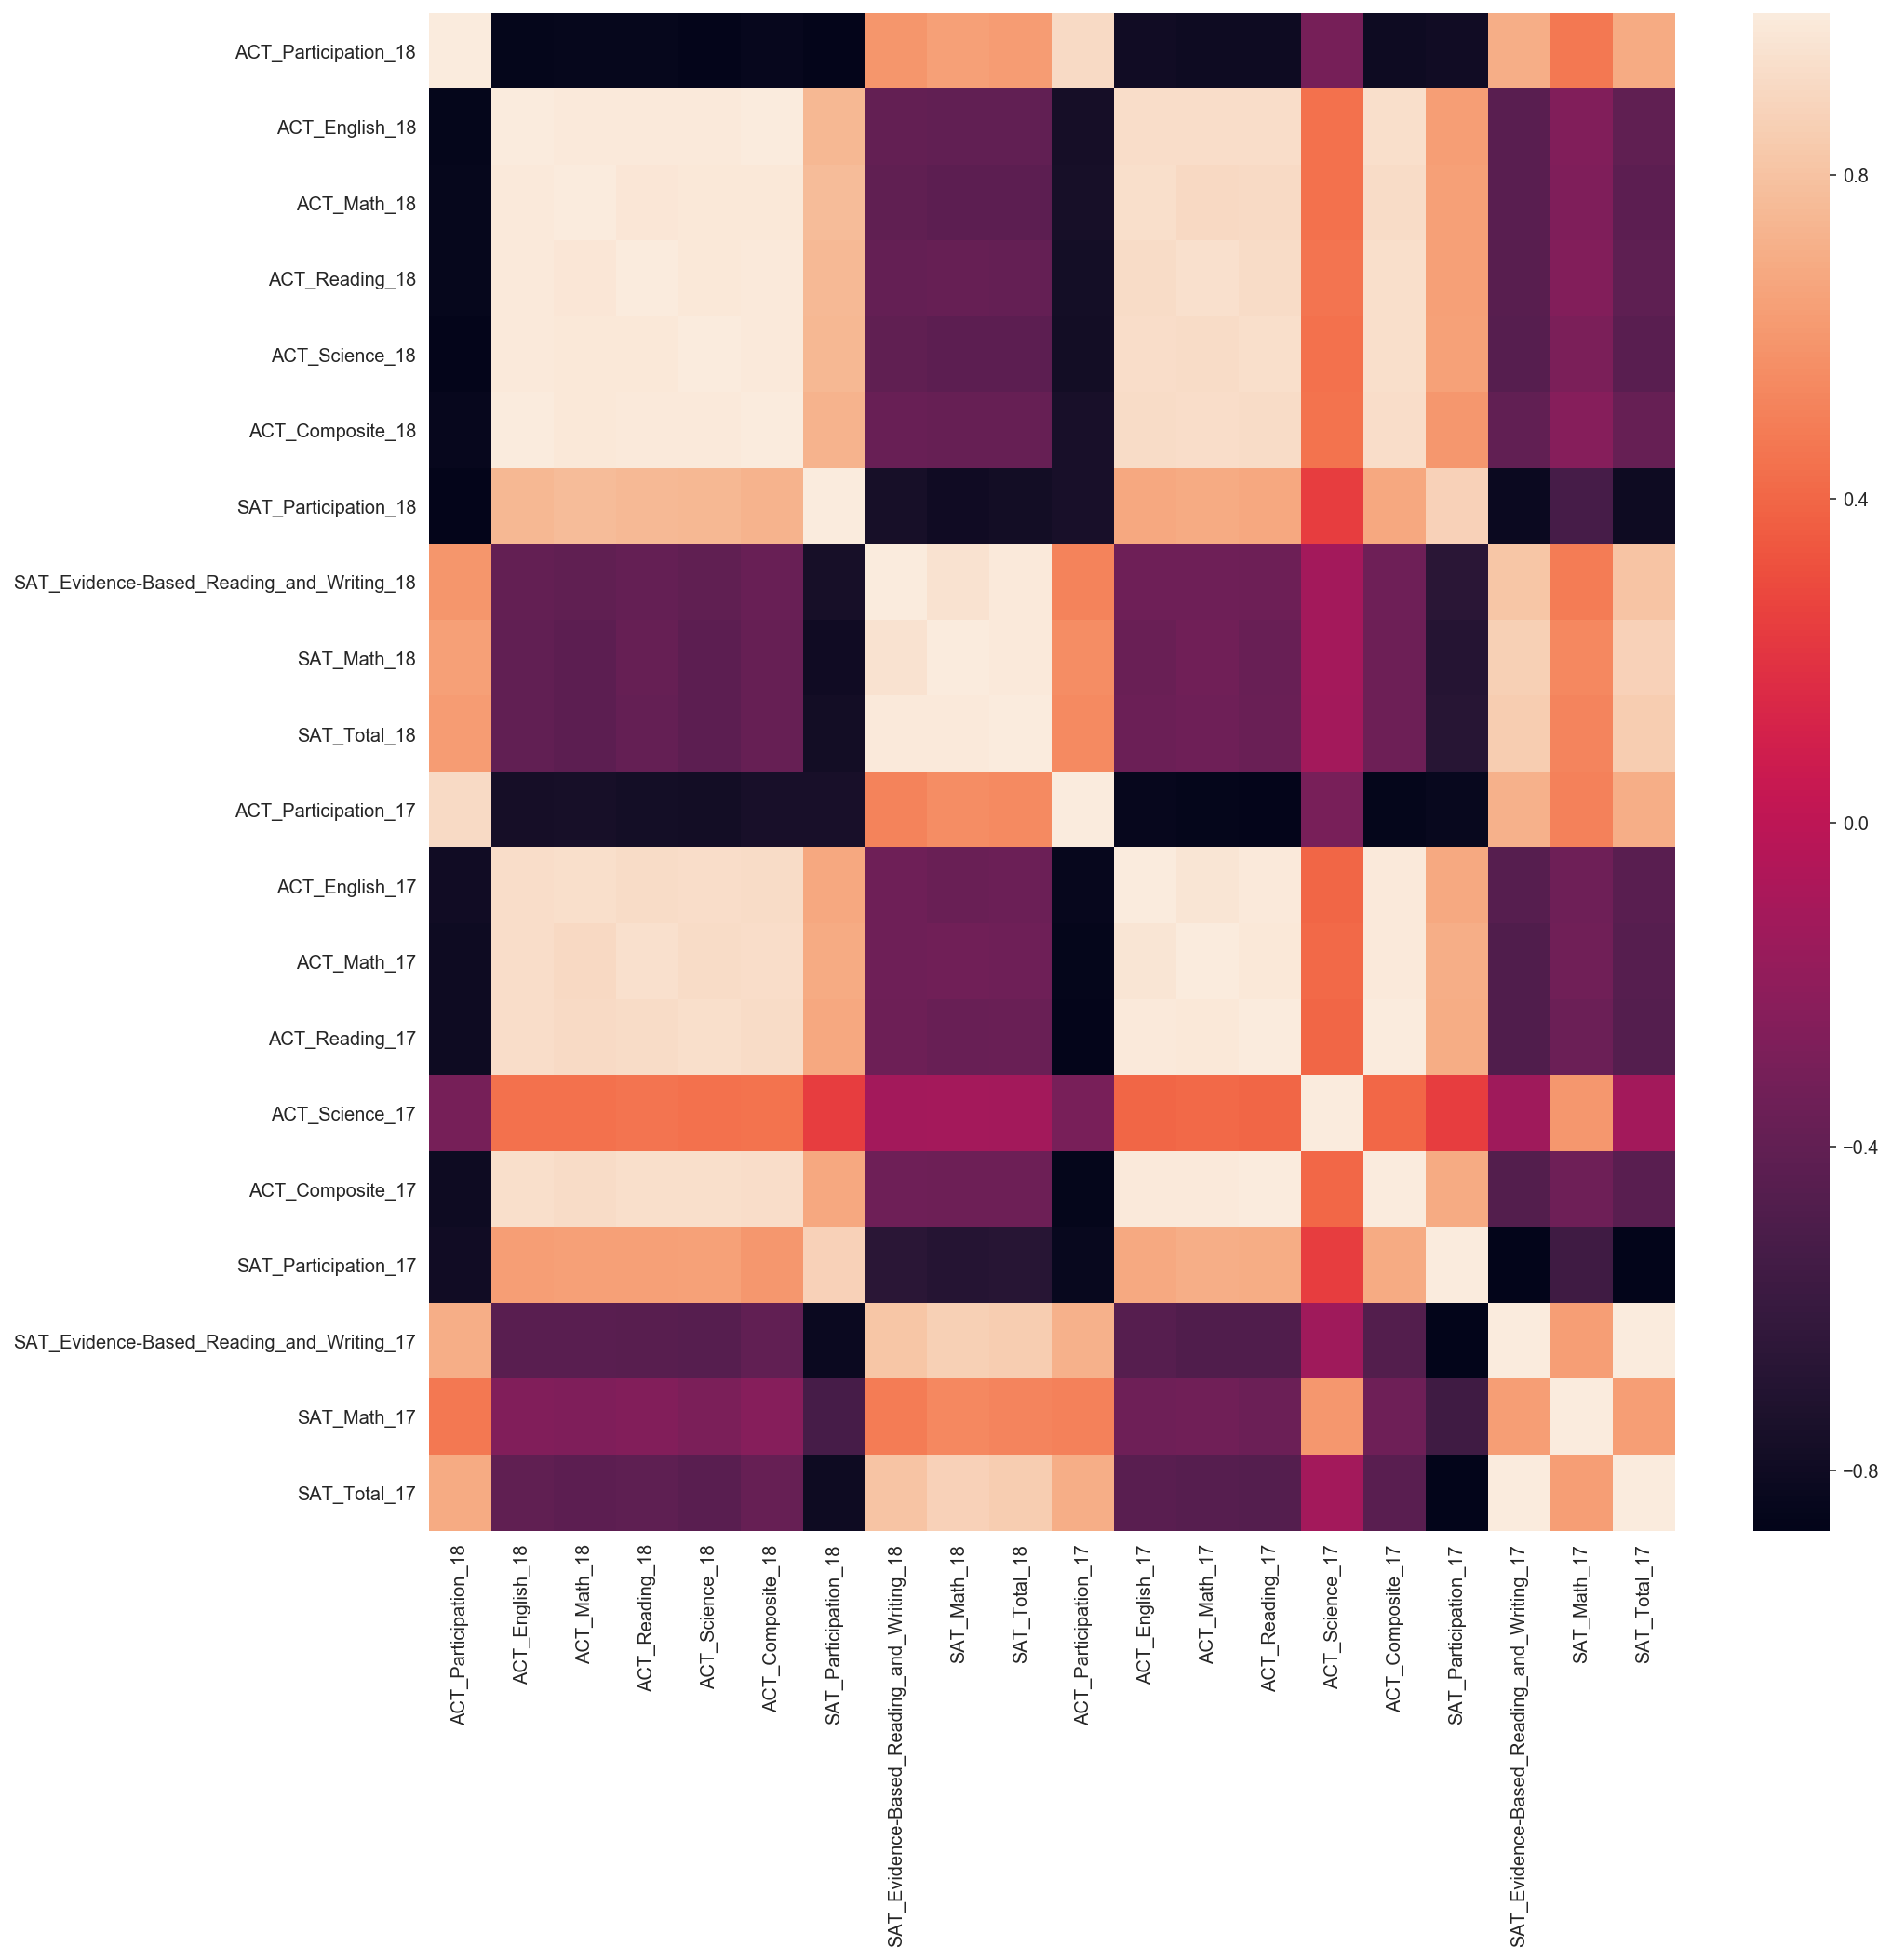

In [108]:
plt.figure(figsize=(15,15))
sns.heatmap(final.corr())

## Conclusions and Recommendations

Based on your exploration of the data, what are you key takeaways and recommendations? Choose one state with a lower participation rate and provide a suggestion for how the College Board might increase participation amongst graduating seniors in this state. Are there additional data you desire that would better inform your investigations?

Increase the number participants taking SAT TO INCREASE THE CHANCES OF PASSING

ACT can merge Reading and English as 1 module to reduce the number of exam modules, students need to take